# Projet DU DATA KRAH KOUAME DAMTY ABRAHAM



### Étape 1 : Prétraitement des Données

#### 1. Chargement des Données

#### 2. Nettoyage des données
- **Valeurs manquantes** 
- **Format des données** 
- **Doublons** 
- **Détection et traitement des outliers** : Identification des valeurs aberrantes à l'aide de méthodes statistiques, comme l'IQR.
#### 3. Fusion des données


### Étape 2 : Analyse Exploratoire des Données (EDA)

#### 1. Statistiques Descriptives

#### 2. Visualisation des données
- **Histogrammes** pour visualiser les distributions des variables continues.
- **Boîtes à moustaches** pour voir les outliers et la dispersion des données.
- **Graphiques à barres** pour les variables catégorielles.

#### 3. Corrélations

### Étape 3: Analyse économétrique

### Étape 3: machine learning (classification + régression)

Dans une logique business, j'ai décidé de centrer mes analyses sur AMT_Claim, le montant que l'assurance débourse pour les sinistres afin de pouvoir effectuer des provisions ou adapter les montants des polices d'assurance.

In [227]:
#packages utilisés
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
# Charger DB_TELEMATICS.csv
telematics_data = pd.read_csv('DB_TELEMATICS.csv',';')

# Charger DB_SIN.txt
claims_data = pd.read_csv('DB_SIN.txt', delimiter='\t')  

# Charger DB_CNT.xlsx
contract_data = pd.read_excel('DB_CNT.xlsx',sheet_name=1)

/var/folders/df/tzlk6_xs46dbdsn2dm2mr21m0000gp/T/ipykernel_31415/3083344852.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  telematics_data = pd.read_csv('DB_TELEMATICS.csv',';')


In [5]:
telematics_data

Id_pol Annual.pct.driven Total.miles.driven Pct.drive.mon  \
0       cnt_122389       0,997260274        5372,837273   0,192885196   
1       cnt_125019       0,912328767        5780,818246   0,103235423   
2       cnt_181154       0,526027397        9149,738331   0,116469365   
3       cnt_140021                 1        10582,26663   0,144175656   
4       cnt_170356        0,75890411        9412,021708   0,109676276   
...            ...               ...                ...           ...   
100327  cnt_215461        0,22739726        1805,053586   0,069532689   
100328  cnt_206415       0,961643836        4513,087229   0,152835123   
100329  cnt_187472       0.498630137  7645.396934038791   0.119524428   
100330  cnt_193966       0.983561644   9354.42693575792   0.072627342   
100331  cnt_129620       0,304109589        2013,059079   0,095567553   

       Pct.drive.tue Pct.drive.wed Pct.drive.thr Pct.drive.fri Pct.drive.sat  \
0        0,169068979   0,197889028   0,184917416    0,16189224   0,056223054   
1         0,11866897   0,107923307   0,137310889   0,174103462   0,203041338   
2        0,145887688    0,13527532   0,173257616   0,160496263   0,084183125   
3        0,151476187   0,168558752   0,171549272   0,177907998   0,114748693   
4        0,152352793   0,151707136   0,160847296   0,140824794   0,151463464   
...              ...           ...           ...           ...           ...   
100327   0,199659464   0,106125289   0,278542941   0,202474321   0,103859745   
100328   0,153833202   0,105779641   0,155288418   0,123644011   0,180593479   
100329   0.140343686   0.131523148   0.142210447    0.10569621   0.268427804   
100330   0.147821284   0.198007487    0.10910057   0.180183148   0.192656561   
100331   0,144426148   0,146339543   0,151470482   0,190755191   0,125101541   

       Pct.drive.sun  ... Left.turn.intensity08 Left.turn.intensity09  \
0        0,037124086  ...                2366.0                1609.0   
1        0,155716612  ...                   4.0                   1.0   
2        0,184430624  ...                   0.0                   0.0   
3        0,071583442  ...                 736.0                 295.0   
4        0,133128241  ...                  33.0                  12.0   
...              ...  ...                   ...                   ...   
100327   0,039805551  ...                  29.0                   6.0   
100328   0,128026127  ...                  60.0                  14.0   
100329   0.092274277  ...                  81.0                  21.0   
100330   0.099603607  ...                 329.0                 180.0   
100331   0,146339542  ...                  50.0                  11.0   

       Left.turn.intensity10 Left.turn.intensity11 Left.turn.intensity12  \
0                      751.0                 339.0                 107.0   
1                        0.0                   0.0                   0.0   
2                        0.0                   0.0                   0.0   
3                       58.0                  16.0                   6.0   
4                        2.0                   1.0                   0.0   
...                      ...                   ...                   ...   
100327                   0.0                   0.0                   0.0   
100328                   2.0                   1.0                   0.0   
100329                   2.0                   0.0                   0.0   
100330                  71.0                  35.0                  17.0   
100331                   0.0                   0.0                   0.0   

       Right.turn.intensity08 Right.turn.intensity09 Right.turn.intensity10  \
0                       766.0                  366.0                   91.0   
1                         5.0                    0.0                    0.0   
2                         0.0                    0.0                    0.0   
3                       656.0                  294.0                

In [6]:
claims_data

Id_pol NB_Claim    AMT_Claim
0     212433        1  1137,079102
1     124370        1  3170,102051
2     208357        1  3753,909668
3     141403        1  16,03637695
4     173366        1  41774,71289
...      ...      ...          ...
4332  181390        1  3507,032593
4333  125458        1            0
4334  185300        1  484,9214172
4335  175683        1            0
4336  215717        1   6034,40625

[4337 rows x 3 columns]

In [7]:
contract_data

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
0       121744       365           59      Female        5   Single  Private   
1       123584       182           32           F       10  Married  Private   
2       133223       365           59           F        9   Single  Commute   
3       124356       237           54        Male        8  Married  Commute   
4       192713       365           40      Female        0  Married  Commute   
...        ...       ...          ...         ...      ...      ...      ...   
100394  130825       365           31      Female        5  Married  Private   
100395  137315       354           45        Male        0  Married  Commute   
100396  205973       365           64           F        8   Single  Private   
100397  177552       330           49        Male        6   Single  Private   
100398  178187       365           63           H       -1  Married  Private   

        Credit.score Region  Annual.miles.drive Years.noclaims  Territory  
0              491.0  Urban            12427.42             40         77  
1              730.0  Rural             6213.71              4         89  
2              689.0  Rural            12427.42             41         85  
3              794.0  Urban             6213.71             37         70  
4              880.0  Urban            12427.42              8         76  
...              ...    ...                 ...            ...        ...  
100394         743.0  Rural            12427.42             15         86  
100395         813.0  Urban            12427.42              3         39  
100396         816.0  Urban             6213.71             44         26  
100397         883.0  Urban            12427.42             32         88  
100398         815.0  Urban             6213.71             42         70  

[100399 rows x 12 columns]

# Prétraitement + EDA de claims_data

Cette base de données contient des informations détaillées sur les réclamations faites par les assurés. Les variables principales qu'on y trouve incluent :

- Id_pol : L'identifiant de la police d'assurance, permettant de lier ces données avec d'autres bases de données comme 'contract_data' et 'telematics_data'.

- NB_Claim : Le nombre de réclamations déposées par le détenteur de la police pendant la période observée. Cette information est cruciale pour analyser la fréquence des sinistres.

- AMT_Claim: Le montant total des réclamations déposées par le détenteur de la police. Ce montant est essentiel pour évaluer la sévérité des sinistres et leur impact financier.

NB: Le terme AMT_Claim fait référence au montant total des réclamations déposées, qui est généralement le coût des sinistres pour l'assureur. Cela représente le montant d'argent que l'assureur a dû payer ou s'engage à payer pour couvrir les réclamations faites par l'assuré en vertu de la politique d'assurance. Ces montants sont ceux que l'assureur débourse pour réparer les dommages, couvrir les pertes ou payer les coûts associés aux sinistres déclarés par les assurés.




In [8]:
claims_data['AMT_Claim']=claims_data['AMT_Claim'].str.replace(',','.') 
claims_data['AMT_Claim']

0       1137.079102
1       3170.102051
2       3753.909668
3       16.03637695
4       41774.71289
           ...     
4332    3507.032593
4333              0
4334    484.9214172
4335              0
4336     6034.40625
Name: AMT_Claim, Length: 4337, dtype: object

In [9]:
claims_data['NB_Claim'].value_counts()

1             4131
2              170
NB_CLAIM:1      23
3               11
NB_CLAIM:2       2
Name: NB_Claim, dtype: int64

In [10]:
claims_data.dtypes

Id_pol        int64
NB_Claim     object
AMT_Claim    object
dtype: object

In [11]:
#on uniformise les valeurs de la colonne NB_Claim
claims_data['NB_Claim']=claims_data['NB_Claim'].str.replace('NB_CLAIM:1','1')
claims_data['NB_Claim']=claims_data['NB_Claim'].str.replace('NB_CLAIM:2','2')

In [12]:
claims_data['NB_Claim'].value_counts()

1    4154
2     172
3      11
Name: NB_Claim, dtype: int64

In [13]:
#on peut maintenant convertir NB_claims en integer vu qu'il s'agit d'une variable de comptage
claims_data['NB_Claim'] = claims_data['NB_Claim'].astype(int)

In [14]:
#on passe maintenant au prétraitement de AMT_Claim
claims_data['AMT_Claim'].value_counts()

0              436
ANN             37
279.9525146      9
477.3110047      7
1710.054932      2
              ... 
9324.375         1
1164.303863      1
1625.644409      1
4381.549073      1
6034.40625       1
Name: AMT_Claim, Length: 3851, dtype: int64

In [15]:
#on va remplacer ANN par des NaN(valeurs manquantes)
claims_data['AMT_Claim']=claims_data['AMT_Claim'].str.replace('ANN','NaN')

In [16]:
#on peut maintenant convertir la colonne en float
claims_data['AMT_Claim'] = claims_data['AMT_Claim'].astype(float)

In [17]:
claims_data['AMT_Claim'].isnull().sum() #Le nombre de valeurs manquantes dans claims_data correspond bien au nombre de ANN(37)

37

In [18]:
claims_data.isnull().sum()

Id_pol        0
NB_Claim      0
AMT_Claim    37
dtype: int64

In [19]:
claims_data[claims_data.duplicated()==True]

Id_pol  NB_Claim  AMT_Claim
2859  149978         1        0.0
3954  161618         1        0.0

In [20]:
claims_data[claims_data['Id_pol']==161618]

Id_pol  NB_Claim  AMT_Claim
695   161618         1        0.0
3954  161618         1        0.0

In [21]:
#suppression des doublons purs de claims_data
claims_data=claims_data[claims_data.duplicated()!=True]

In [22]:
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4335 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_pol     4335 non-null   int64  
 1   NB_Claim   4335 non-null   int64  
 2   AMT_Claim  4298 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.5 KB


In [23]:
#doublons sur la base de l'id du contrat
duplicates_claim=claims_data[claims_data.duplicated(subset='Id_pol',keep=False)]

In [24]:
# On filtre pour obtenir seulement les doublons avec un AMT nul
duplicates_with_zero_amt = duplicates_claim[duplicates_claim['AMT_Claim'] == 0]

# On utilise l'index des doublons avec AMT nul pour les exclure du dataframe original
claims_data = claims_data.drop(duplicates_with_zero_amt.index)

claims_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4309 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_pol     4309 non-null   int64  
 1   NB_Claim   4309 non-null   int64  
 2   AMT_Claim  4272 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 134.7 KB


In [25]:
#Id_pol sera notre index
claims_data.set_index('Id_pol')

NB_Claim     AMT_Claim
Id_pol                        
212433         1   1137.079102
124370         1   3170.102051
208357         1   3753.909668
141403         1     16.036377
173366         1  41774.712890
...          ...           ...
181390         1   3507.032593
125458         1      0.000000
185300         1    484.921417
175683         1      0.000000
215717         1   6034.406250

[4309 rows x 2 columns]

In [26]:
claims_data['Id_pol']=claims_data['Id_pol'].astype(str) #convertir l'Id en chaîne de caractère

In [27]:
claims_data.describe(include='object')

Id_pol
count     4309
unique    4309
top     212433
freq         1

# EDA claims_data

### Représentations graphiques pour claims_data
L'histogramme et le diagramme à barres (ou bar chart) sont deux types de visualisations graphiques souvent utilisés en analyse de données, mais ils servent à illustrer des types de données différents et offrent des perspectives distinctes :

#### Histogramme
- **Utilisation** : Un histogramme est utilisé principalement pour représenter la distribution de données quantitatives continues ou discrètes mais regroupées en intervalles continus (bins). Il montre la fréquence des données dans chaque intervalle de classe, ce qui permet de comprendre la distribution générale de ces données (par exemple, normale, biaisée, etc.).
- **Axes** : L'axe des x représente les intervalles de classe pour les données (par exemple, des gammes de valeurs numériques), et l'axe des y indique la fréquence des données dans chaque intervalle.
- **Apparence** : Les barres d'un histogramme sont collées les unes aux autres pour souligner que les données sont continues sur l'axe des x, indiquant une progression naturelle d'une classe à l'autre sans interruption.

#### Diagramme à barres
- **Utilisation** : Un diagramme à barres est utilisé pour représenter des données catégorielles ou des données quantitatives discrètes. Il est idéal pour comparer des quantités entre différentes catégories (par exemple, le nombre de personnes dans différents groupes d'âge, les ventes par région, etc.).
- **Axes** : L'axe des x montre les différentes catégories, et l'axe des y montre les mesures correspondantes (souvent une mesure de fréquence, des totaux ou des moyennes).
- **Apparence** : Les barres dans un diagramme à barres sont séparées par des espaces pour indiquer que les catégories sont distinctes et non reliées les unes aux autres, soulignant l'absence de continuité ordonnée entre les catégories.


Chaque type de graphique aide à visualiser les données d'une manière qui met en évidence les caractéristiques pertinentes pour l'analyse, comme la distribution dans le cas de l'histogramme ou la comparaison entre groupes pour le diagramme à barres.

Nous uiliserons l'histogramme pour AMT_Claim et le diagramme à barres pour NB_Claim vu qu'il s'agit d'une variable de comptage.

In [28]:
claims_data.describe()

NB_Claim      AMT_Claim
count  4309.000000    4272.000000
mean      1.045022    3183.896842
std       0.219344    5160.610717
min       1.000000       0.000000
25%       1.000000     522.867874
50%       1.000000    1713.142639
75%       1.000000    3742.021362
max       3.000000  104074.886700

Text(0.5, 1.0, 'histogramme montrant la distribution des données de AMT_Claim')

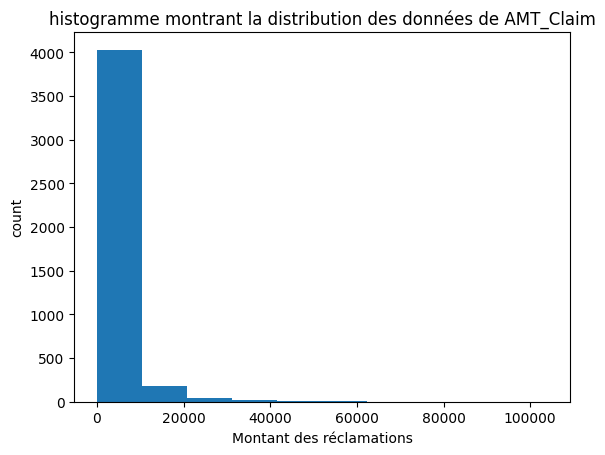

In [29]:
#histogramme montrant la distribution des données de AMT_Claim

plt.pyplot.hist(claims_data["AMT_Claim"])

# set x/y labels and plot title
plt.pyplot.xlabel("Montant des réclamations")
plt.pyplot.ylabel("count")
plt.pyplot.title("histogramme montrant la distribution des données de AMT_Claim")

Nous constatons grâce à l'histogramme que la grande majorité des réclamations dans 'claims_data' a un montant compris entre 0 et 20000. 
L'observation d'une majorité de montants de réclamations se regroupant entre 0 et 20,000 pourrait suggérer une distribution gamma, étant donné que cette distribution est souvent utilisée pour modéliser des données qui sont fortement asymétriques et limitées à des valeurs positives. La forme de la distribution gamma correspond bien à cette concentration de valeurs basses avec une longue queue vers des valeurs plus élevées.

Text(0.5, 0, 'Montant des Réclamations')

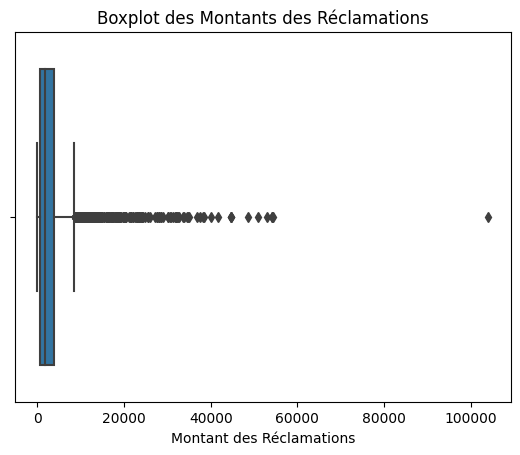

In [30]:

#boîte à moustache du montant des sinistres
sns.boxplot(x=claims_data['AMT_Claim'])
plt.pyplot.title('Boxplot des Montants des Réclamations')
plt.pyplot.xlabel('Montant des Réclamations')

Le Boxplot suggère ici la présence d'un nombre assez élevé de valeurs aberrantes dans notre df.
Nous allons calculer les quantiles Q1 et Q3 afin de déterminer l'écart interquartile(IQR).
Vu que le montant des sinistres est supérieur ou égal à 0,sont considérées comme valeurs aberrantes, les valeurs supérieures à Q3+1,5*IQR. 

Dans notre contexte, une valeur aberrante (ou outlier) désigne un montant de réclamation qui s'écarte significativement de la majorité des autres montants dans les données, en étant beaucoup plus élevé que ce que l'on observe typiquement. Ces valeurs peuvent indiquer des sinistres exceptionnellement coûteux ou des erreurs de saisie.

Retirer les valeurs aberrantes peut être nécessaire pour éviter que ces valeurs extrêmes ne biaisent les analyses statistiques et les modèles prédictifs, améliorant ainsi l'exactitude et la robustesse des résultats. De plus, l'élimination des outliers permet d'obtenir une meilleure représentation des tendances générales et des comportements typiques dans les données.

In [31]:

Q1 = claims_data['AMT_Claim'].quantile(0.25)
Q3 = claims_data['AMT_Claim'].quantile(0.75)
IQR = Q3 - Q1

# Calcul du seuil au-delà duquel une valeur est considérée comme une valeur aberrante
outlier_threshold = Q3 + 1.5 * IQR

# Identification les valeurs aberrantes
outliers = claims_data[claims_data['AMT_Claim'] > outlier_threshold]

# Calcul du pourcentage des valeurs aberrantes par rapport au total des observations
percentage_outliers = (len(outliers) / len(claims_data)) * 100

print(f"Pourcentage de valeurs aberrantes : {percentage_outliers:.2f}%")

Pourcentage de valeurs aberrantes : 7.94%


In [32]:

#Vu que les outliers ne représentent que 8% des observations totales, nous nous permettons de les retirer
claims_data = claims_data[claims_data['AMT_Claim'] <= outlier_threshold]

In [33]:
len(claims_data)

3930

Text(0, 0.5, 'Nombre de Polices')

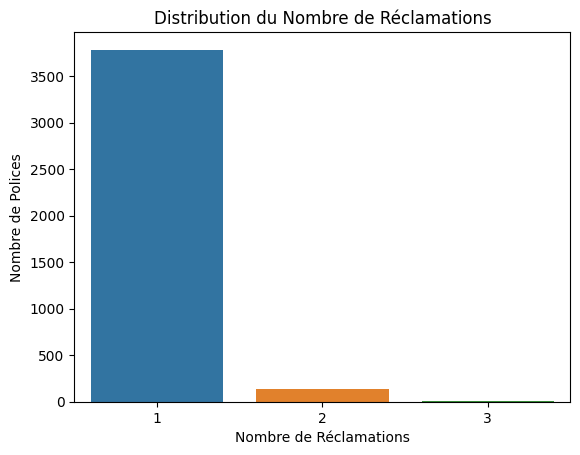

In [34]:

# diagramme à barres montrant la répartition de 'NB_Claim' 
sns.countplot(x='NB_Claim', data=claims_data)
plt.pyplot.title('Distribution du Nombre de Réclamations')
plt.pyplot.xlabel('Nombre de Réclamations')
plt.pyplot.ylabel('Nombre de Polices')


### Sur la période allant de 2013 à 2016, l'on a enrigistré principalement 1 réclamation par contrat (Plus de 75% de la base).

# Prétraitement + EDA de 'contract_data'

Cette base de données contient les informations relatives aux contrats d'assurance souscrits par les clients. Voici les types de variables typiquement incluses :

- **Id_pol** : L'identifiant unique de la police d'assurance, servant de clé principale.
- **Duration** : La durée de couverture de l'assurance, exprimée en jours.
- **Insured.age** : L'âge de l'assuré, un facteur important dans le calcul du risque et de la prime.
- **Insured.sex** : Le sexe de l'assuré, qui peut influencer les statistiques de risque.
- **Car.age** : L'âge du véhicule assuré, plus le véhicule est vieux, potentiellement plus le risque de panne est élevé.
- **Marital** : Le statut marital de l'assuré, pouvant affecter le profil de risque.
- **Car.use** : L'utilisation du véhicule, comme privée ou commerciale, affectant également le risque.
- **Credit.score** : Le score de crédit de l'assuré, indicatif de sa fiabilité financière. 

« La discipline financière d’un assuré est représentative du soin qu’il porte à sa voiture ou son habitation », élabore Anne Morin, responsable des affaires publiques du Bureau d’assurance du Canada (BAC).
Le pointage (ou score) de crédit est une cote, variant entre 300 et 900, attribuée par les agences de crédit (Equifax et TransUnion),au Canada, qui confectionnent votre dossier de crédit. Si votre cote dépasse les 700, c’est très bon.
https://www.guideautoweb.com/articles/62376/les-impacts-de-votre-score-de-credit-sur-votre-police-d-assurance-automobile/

- **Region** : La région de résidence de l'assuré, car les risques varient géographiquement.
- **Annual.miles.drive** : Les miles annuels prévus, affectant directement l'exposition au risque.
- **Years.noclaims** : Le nombre d'années sans réclamation, un indicateur de la prudence du conducteur.

En principe, la variable "Years.noclaims" représente le nombre d'années sans réclamation au moment de la souscription du contrat. Il est possible que le nombre d'années sans réclamation soit supérieur à la durée du contrat. Cela pourrait indiquer que l'assuré avait déjà un historique de plusieurs années sans réclamation avant de souscrire ce contrat spécifique.

- **Territory** : Le code territorial où le véhicule est principalement utilisé.


In [35]:
contract_data.dtypes

Id_pol                  int64
Duration                int64
Insured.age             int64
Insured.sex            object
Car.age                 int64
Marital                object
Car.use                object
Credit.score          float64
Region                 object
Annual.miles.drive    float64
Years.noclaims         object
Territory               int64
dtype: object

Nous allons d'abord nous intéresser aux variables catégorielles.

In [36]:
contract_data.describe(include='object')

Insured.sex  Marital  Car.use  Region  Years.noclaims
count       100399   100307   100399  100271          100399
unique           5        4      111       2              84
top           Male  Married  Commute   Urban               9
freq         45932    65666    49855   78358            2436

In [37]:
#Les catégories d'usage des véhicules
contract_data['Car.use'].value_counts()

Commute       49855
Private       46103
Commercial     2650
Farmer         1411
                 17
              ...  
97                1
49                1
83                1
73                1
                  1
Name: Car.use, Length: 111, dtype: int64

In [38]:
#on ne retient que les 4 catégories d'usage qui nous intéressent (elles sont majoritaires)
contract_data = contract_data[contract_data['Car.use'].isin(['Private', 'Commute', 'Farmer', 'Commercial'])]


In [39]:
#sexes des assurés
contract_data['Insured.sex'].value_counts()

Male       45737
Female     38880
H           8165
F           7124
Unknown      113
Name: Insured.sex, dtype: int64

In [40]:
#on retire les lignes de sexes unkown
contract_data = contract_data[contract_data['Insured.sex'] != 'Unknown']

In [41]:
#on uniformise les differents enregistrements de sexes
contract_data['Insured.sex']=contract_data['Insured.sex'].str.replace('H','Male')
contract_data['Insured.sex']=contract_data['Insured.sex'].str.replace('F','Female')

In [42]:
contract_data['Insured.sex'].value_counts()

Male           53902
Femaleemale    38880
Female          7124
Name: Insured.sex, dtype: int64

In [43]:
contract_data['Insured.sex']=contract_data['Insured.sex'].str.replace('Femaleemale','Female')

In [44]:
contract_data['Insured.sex'].value_counts()

Male      53902
Female    46004
Name: Insured.sex, dtype: int64

On a presqu'autant d'hommes que de femmes dans nos données.(environ 54% d'hommes et 46%de femmes)

In [45]:
contract_data['Marital'].value_counts()

Married    65319
Single     28068
Marié       4467
Celib       1960
Name: Marital, dtype: int64

In [46]:
contract_data['Marital']=contract_data['Marital'].str.replace('Marié','Married')
contract_data['Marital']=contract_data['Marital'].str.replace('Celib','Single')
contract_data['Marital'].value_counts()

Married    69786
Single     30028
Name: Marital, dtype: int64

Il y'a plus de personnnes mariées que célibataires parmi les assurés. (environ 70% de mariés contre 30% de célibataires).

In [47]:
contract_data['Region'].value_counts()

Urban    77989
Rural    21789
Name: Region, dtype: int64

La majorité des assurés vit en zone urbaine. (environ 78%)

In [48]:
contract_data[['Marital','Insured.sex','Region']].value_counts()

Marital  Insured.sex  Region
Married  Male         Urban     31342
         Female       Urban     22151
Single   Female       Urban     13149
         Male         Urban     11277
Married  Male         Rural      8553
         Female       Rural      7647
Single   Female       Rural      2953
         Male         Rural      2614
dtype: int64

In [49]:
# Calcul des pourcentage pour chaque combinaison de valeurs dans les colonnes 'Marital', 'Insured.sex' et 'Region'
group_analysis = contract_data[['Marital', 'Insured.sex', 'Region']].value_counts(normalize=True) * 100

# Afficher les comptes en pourcentage
print(group_analysis)

Marital  Insured.sex  Region
Married  Male         Urban     31.440724
         Female       Urban     22.220773
Single   Female       Urban     13.190418
         Male         Urban     11.312521
Married  Male         Rural      8.579941
         Female       Rural      7.671087
Single   Female       Rural      2.962302
         Male         Rural      2.622234
dtype: float64


L'analyse en pourcentage des données révèle des différences significatives dans la répartition des variables étudiées.
Environ 31,4% des assurés sont mariés, de sexe masculin et résident en zone urbaine, contre environ 22,2% de sexe féminin. 
En revanche, environ 8,6% d'hommes mariés vivent en zone rurale contre environ 7,7% de femmes mariées. 

Ces données fournissent des insights sur les tendances démographiques des assurés dans différentes régions, mettant en évidence des disparités potentiellement importantes en fonction du statut marital et du sexe.

Dans notre ensemble de données, l'on constate que ces disparités ne sont pas très importantes.

In [50]:
#Years.noclaims représente le nombre d'années sans réclamation. nous allons donc convertir le type de cette colonne en integer
contract_data['Years.noclaims'].astype(int)

ValueError: invalid literal for int() with base 10: 'EAJ'

In [51]:
#Il y'a un élément qui bloque la modification du type de 'Years.noclaims'. Nous allons retirer les lignes où 'Years.noclaims' = 'EAJ'
contract_data=contract_data[contract_data['Years.noclaims']!='EAJ']

In [52]:
#Nous pouvons maintenant procéder à la transformation
contract_data['Years.noclaims']=contract_data['Years.noclaims'].astype(int)

In [53]:
contract_data.describe(include='object')

Insured.sex  Marital  Car.use Region
count        99870    99778    99870  99742
unique           2        2        4      2
top           Male  Married  Commute  Urban
freq         53883    69763    49771  77958

Il semblerait que les retraitements aient été bien effectués.

In [54]:
#Passons maintenant aux valeurs manquantes
contract_data.isnull().sum()

Id_pol                  0
Duration                0
Insured.age             0
Insured.sex             0
Car.age                 0
Marital                92
Car.use                 0
Credit.score            0
Region                128
Annual.miles.drive      0
Years.noclaims          0
Territory               0
dtype: int64

In [55]:
len(contract_data)

99870

Il y'a 92 valeurs manquantes au niveau du statut conjugal et 128 au niveau de Region.
Vu que nous avons plus de 99000 lignes dans le dataset et qu'il s'agit de variables catégorielles, nous allons remplacer les valeurs manquantes par les valeurs les plus fréquentes des colonnes concernées.

In [56]:
#remplacement des NA par les valeurs les plus fréquentes
contract_data['Marital'].fillna(contract_data['Marital'].mode()[0], inplace=True)
contract_data['Region'].fillna(contract_data['Region'].mode()[0], inplace=True)

In [57]:
contract_data.isnull().sum()

Id_pol                0
Duration              0
Insured.age           0
Insured.sex           0
Car.age               0
Marital               0
Car.use               0
Credit.score          0
Region                0
Annual.miles.drive    0
Years.noclaims        0
Territory             0
dtype: int64

Il n'y a plus de valeur manquante.

In [58]:
#on s'intéresse maintenant aux doublons
contract_data.duplicated().sum()

5

In [59]:
#suppression des doublons purs de contract_data
contract_data=contract_data[contract_data.duplicated()!=True]

In [60]:
#doublons sur la base de l'id du contrat
duplicates_contract=contract_data[contract_data.duplicated(subset='Id_pol',keep=False)]


In [61]:
duplicates_contract

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
2699    143962       181           47      Female       -1   Single  Commute   
3549    187006       366           42      Female        7   Single  Commute   
4104    170468       366           59      Female        8   Single  Commute   
4457    126690       182           44      Female        3  Married  Commute   
4510    191319       365           35        Male        8  Married  Commute   
...        ...       ...          ...         ...      ...      ...      ...   
98633   218371       183           78        Male        0  Married  Private   
98996   178092         0           71        Male        6  Married  Private   
99368   126690         0           44      Female        3  Married  Commute   
99851   129569       182           68        Male        5  Married  Private   
100186  195218       366           39        Male        7   Single  Commute   

        Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  
2699           814.0  Urban           12427.420              30         83  
3549           754.0  Urban           12427.420              26         87  
4104           713.0  Urban           11184.678              35         84  
4457           575.0  Urban           12427.420              20         26  
4510           818.0  Urban           12427.420              11         70  
...              ...    ...                 ...             ...        ...  
98633          848.0  Urban            6213.710              61         60  
98996          842.0  Urban            6213.710              43         30  
99368          575.0  Urban           12427.420              20         26  
99851          900.0  Rural           12427.420              52         31  
100186         762.0  Rural           12427.420              23         57  

[94 rows x 12 columns]

In [62]:
duplicates_contract[duplicates_contract['Id_pol']==218371]

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
50865  218371        66           78        Male        0   Single  Private   
98633  218371       183           78        Male        0  Married  Private   

       Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  
50865         848.0  Urban             6213.71              61         60  
98633         848.0  Urban             6213.71              61         60

In [63]:
duplicates_contract[duplicates_contract['Id_pol']==143962]

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
2699   143962       181           47      Female       -1   Single  Commute   
52534  143962       365           47      Female       -1  Married  Commute   

       Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  
2699          814.0  Urban            12427.42              30         83  
52534         814.0  Urban            12427.42              30         83

In [64]:
duplicates_contract[duplicates_contract['Id_pol']==126690]

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
4457   126690       182           44      Female        3  Married  Commute   
99368  126690         0           44      Female        3  Married  Commute   

       Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  
4457          575.0  Urban            12427.42              20         26  
99368         575.0  Urban            12427.42              20         26

In [65]:
# Identifier les doublons par 'Id_pol'
duplicates_contract = contract_data[contract_data.duplicated('Id_pol', keep=False)]

# Fonction pour identifier les changements
def identify_column_changes(group):
    changes = {}
    # Comparer chaque colonne
    for col in group.columns:
        if group[col].nunique() > 1:  # Si la colonne contient plusieurs valeurs différentes
            changes[col + '_changed'] = True
        else:
            changes[col + '_changed'] = False
    return pd.Series(changes)

# Appliquer la fonction de comparaison à chaque groupe de doublons
changes_df = duplicates_contract.groupby('Id_pol').apply(identify_column_changes).reset_index()

# Joindre les indicateurs de changement au DataFrame original pour une analyse intégrée
final_df = pd.merge(duplicates_contract, changes_df, on='Id_pol', how='left')
final_df

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
0   143962       181           47      Female       -1   Single  Commute   
1   187006       366           42      Female        7   Single  Commute   
2   170468       366           59      Female        8   Single  Commute   
3   126690       182           44      Female        3  Married  Commute   
4   191319       365           35        Male        8  Married  Commute   
..     ...       ...          ...         ...      ...      ...      ...   
89  218371       183           78        Male        0  Married  Private   
90  178092         0           71        Male        6  Married  Private   
91  126690         0           44      Female        3  Married  Commute   
92  129569       182           68        Male        5  Married  Private   
93  195218       366           39        Male        7   Single  Commute   

    Credit.score Region  Annual.miles.drive  ...  Insured.age_changed  \
0          814.0  Urban           12427.420  ...                False   
1          754.0  Urban           12427.420  ...                False   
2          713.0  Urban           11184.678  ...                False   
3          575.0  Urban           12427.420  ...                False   
4          818.0  Urban           12427.420  ...                False   
..           ...    ...                 ...  ...                  ...   
89         848.0  Urban            6213.710  ...                False   
90         842.0  Urban            6213.710  ...                False   
91         575.0  Urban           12427.420  ...                False   
92         900.0  Rural           12427.420  ...                False   
93         762.0  Rural           12427.420  ...                False   

    Insured.sex_changed  Car.age_changed  Marital_changed  Car.use_changed  \
0                 False            False             True            False   
1                 False            False             True            False   
2                 False            False             True            False   
3                 False            False            False            False   
4                 False            False             True            False   
..                  ...              ...              ...              ...   
89                False            False             True            False   
90                False            False            False            False   
91                False            False            False            False   
92                False            False             True            False   
93                False            False             True            False   

    Credit.score_changed  Region_changed  Annual.miles.drive_changed  \
0                  False           False                       False   
1                  False           False                       False   
2                  False           False                       False   
3                  False           False                       False   
4                  False           False                       False   
..                   ...             ...                         ...   
89                 False           False                       False   
90                 False           False                       False   
91                 False           False                       False   
92                 False           False                       False   
93                 False           False                       False   

    Years.noclaims_changed  Territory_changed  
0                    False              False  
1                    False              False  
2                    False              False  
3                    False              False  
4                    False              False  
..                     ...                ...  
89                   False              False  
90                   False  

In [67]:
final_df.describe(include='boolean')

Id_pol_changed Duration_changed Insured.age_changed  \
count              94               94                  94   
unique              1                2                   1   
top             False             True               False   
freq               94               92                  94   

       Insured.sex_changed Car.age_changed Marital_changed Car.use_changed  \
count                   94              94              94              94   
unique                   1               1               2               1   
top                  False           False            True           False   
freq                    94              94              84              94   

       Credit.score_changed Region_changed Annual.miles.drive_changed  \
count                    94             94                         94   
unique                    1              1                          1   
top                   False          False                      False   
freq                     94             94                         94   

       Years.noclaims_changed Territory_changed  
count                      94                94  
unique                      1                 1  
top                     False             False  
freq                       94                94


Id_pol_changed: Pas de changements détectés ici, car chaque Id_pol reste le même.

Changements significatifs:
Duration_changed: Les changements dans la durée ont été détectés dans 92 des 94 cas (presque tous).

Marital_changed: 10 groupes sur 94 montrent des changements dans le statut marital.

Aucun changement dans les autres attributs tels que Insured.age, Insured.sex, Car.use, etc. dans tous les doublons, car tous affichent "False" comme valeur la plus fréquente.

Les changements sont principalement observés dans la durée des contrats et dans quelques cas dans le statut marital.
Les autres attributs restent constants pour chaque Id_pol, ce qui pourrait indiquer une continuité dans les informations fournies ou une stabilité dans le comportement des assurés.

Logique de Filtrage

Supprimer les Doublons Non Changés:
Si Duration change mais que Marital ne change pas, supprimer la ligne dupliquée.

Conserver les Changements de Statut:
Si Marital change, conserver toutes les lignes pour suivre l'historique.

Doublons Non Changés:
Si le statut marital ne change pas parmi les doublons d'un même Id_pol, ne conserver que la ligne avec la plus grande Duration.

Doublons Changés:
Si le statut marital change parmi les doublons d'un même Id_pol, conserver toutes les lignes pour préserver l'historique des variations.

In [79]:
duplicates_contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 2699 to 100186
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id_pol              94 non-null     object 
 1   Duration            94 non-null     int64  
 2   Insured.age         94 non-null     int64  
 3   Insured.sex         94 non-null     object 
 4   Car.age             94 non-null     int64  
 5   Marital             94 non-null     object 
 6   Car.use             94 non-null     object 
 7   Credit.score        94 non-null     float64
 8   Region              94 non-null     object 
 9   Annual.miles.drive  94 non-null     float64
 10  Years.noclaims      94 non-null     int64  
 11  Territory           94 non-null     int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 9.5+ KB


In [81]:
duplicates_contract.isnull().sum()

Id_pol                0
Duration              0
Insured.age           0
Insured.sex           0
Car.age               0
Marital               0
Car.use               0
Credit.score          0
Region                0
Annual.miles.drive    0
Years.noclaims        0
Territory             0
dtype: int64

In [71]:
# Convertir `Id_pol` en chaîne dans chaque base de données
contract_data['Id_pol'] = contract_data['Id_pol'].astype(str)
duplicates_contract['Id_pol'] = duplicates_contract['Id_pol'].astype(str)
filtered_contracts['Id_pol'] = filtered_contracts['Id_pol'].astype(str)


/var/folders/df/tzlk6_xs46dbdsn2dm2mr21m0000gp/T/ipykernel_31415/1642986842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates_contract['Id_pol'] = duplicates_contract['Id_pol'].astype(str)


In [83]:
# Listes pour stocker les indices à garder et à exclure
indices_to_keep = []
indices_to_exclude = []

# Parcourir chaque groupe de doublons
for id_pol, group in duplicates_contract.groupby('Id_pol'):
    if group['Marital'].nunique() > 1:  # Si `Marital` change
        indices_to_keep.extend(group.index)
    else:  # Sinon, garder seulement la ligne avec la plus longue durée
        max_duration_idx = group['Duration'].idxmax()
        indices_to_keep.append(max_duration_idx)
        indices_to_exclude.extend(group.index.difference([max_duration_idx]))

# Vérifier les résultats
print(f"Indices à garder : {len(indices_to_keep)}")
print(f"Indices à exclure : {len(indices_to_exclude)}")


Indices à garder : 89
Indices à exclure : 5


In [84]:
# Créer les DataFrames basés sur les indices à garder et à exclure
df_to_keep = duplicates_contract.loc[indices_to_keep]
df_to_exclude = duplicates_contract.loc[indices_to_exclude]

# Afficher les DataFrames
print("Lignes à garder :")
print(df_to_keep)

print("\nLignes à exclure :")
print(df_to_exclude)


Lignes à garder :
       Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
29582  126070       366           50        Male       12  Married  Commute   
44050  126070       110           50        Male       12   Single  Commute   
4457   126690       182           44      Female        3  Married  Commute   
37670  129177       255           44        Male        3   Single  Commute   
42532  129177       365           44        Male        3  Married  Commute   
...       ...       ...          ...         ...      ...      ...      ...   
53187  218653       184           48      Female        6  Married  Commute   
42790  218672       366           64      Female        8  Married  Private   
63916  218672        50           64      Female        8   Single  Private   
12806  220234       220           40        Male        5   Single  Commute   
70526  220234       365           40        Male        5  Married  Commute   

       Credit.score Region  Annua

In [85]:
df_to_exclude

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
99368  126690         0           44      Female        3  Married  Commute   
81455  147733         0           84        Male       10  Married  Private   
98996  178092         0           71        Male        6  Married  Private   
96027  187368         0           45        Male       -1  Married  Commute   
85550  218653         0           48      Female        6  Married  Commute   

       Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  
99368         575.0  Urban            12427.42              20         26  
81455         856.0  Urban             6213.71              65         70  
98996         842.0  Urban             6213.71              43         30  
96027         609.0  Urban             6213.71              25         70  
85550         847.0  Urban            12427.42              14         84

In [88]:
duplicates_contract[duplicates_contract['Id_pol']=='178092']

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
67688  178092       183           71        Male        6  Married  Private   
98996  178092         0           71        Male        6  Married  Private   

       Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  
67688         842.0  Urban             6213.71              43         30  
98996         842.0  Urban             6213.71              43         30

In [90]:
# Exclure les indices identifiés dans `contract_data`
contract_data= contract_data.drop(index=indices_to_exclude)



KeyError: '[99368, 81455, 98996, 96027, 85550] not found in axis'

In [91]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99860 entries, 0 to 100398
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id_pol              99860 non-null  object 
 1   Duration            99860 non-null  int64  
 2   Insured.age         99860 non-null  int64  
 3   Insured.sex         99860 non-null  object 
 4   Car.age             99860 non-null  int64  
 5   Marital             99860 non-null  object 
 6   Car.use             99860 non-null  object 
 7   Credit.score        99860 non-null  float64
 8   Region              99860 non-null  object 
 9   Annual.miles.drive  99860 non-null  float64
 10  Years.noclaims      99860 non-null  int64  
 11  Territory           99860 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 11.9+ MB


In [92]:
#doublons sur la base de l'id du contrat
duplicates_contract=contract_data[contract_data.duplicated(subset='Id_pol',keep=False)]

In [93]:
duplicates_contract

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
2699    143962       181           47      Female       -1   Single  Commute   
3549    187006       366           42      Female        7   Single  Commute   
4104    170468       366           59      Female        8   Single  Commute   
4510    191319       365           35        Male        8  Married  Commute   
5818    140955       365           46        Male        3  Married  Commute   
...        ...       ...          ...         ...      ...      ...      ...   
97132   197768       130           62      Female        7   Single  Commute   
98385   144494        39           76      Female        1   Single  Private   
98633   218371       183           78        Male        0  Married  Private   
99851   129569       182           68        Male        5  Married  Private   
100186  195218       366           39        Male        7   Single  Commute   

        Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  
2699           814.0  Urban           12427.420              30         83  
3549           754.0  Urban           12427.420              26         87  
4104           713.0  Urban           11184.678              35         84  
4510           818.0  Urban           12427.420              11         70  
5818           862.0  Urban           12427.420              25         73  
...              ...    ...                 ...             ...        ...  
97132          875.0  Urban            6213.710              43         52  
98385          900.0  Urban            9320.565              50         14  
98633          848.0  Urban            6213.710              61         60  
99851          900.0  Rural           12427.420              52         31  
100186         762.0  Rural           12427.420              23         57  

[84 rows x 12 columns]

In [95]:
# Identifier les doublons en gardant uniquement la ligne avec la durée la plus longue
indices_to_keep = duplicates_contract.groupby('Id_pol')['Duration'].idxmax()
len(indices_to_keep)


42

In [97]:
# Identifier les indices à garder dans les doublons
indices_to_keep = duplicates_contract.groupby('Id_pol')['Duration'].idxmax()

# Retirer les indices à exclure de `contract_data`
contract_data_cleaned = contract_data.drop(index=duplicates_contract.index.difference(indices_to_keep))

# Vérifier les résultats
print(f"Nombre de lignes initial: {contract_data.shape[0]}")
print(f"Nombre de lignes après nettoyage: {contract_data_cleaned.shape[0]}")


Nombre de lignes initial: 99860
Nombre de lignes après nettoyage: 99818


In [98]:
contract_data = contract_data_cleaned

In [99]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99818 entries, 0 to 100398
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id_pol              99818 non-null  object 
 1   Duration            99818 non-null  int64  
 2   Insured.age         99818 non-null  int64  
 3   Insured.sex         99818 non-null  object 
 4   Car.age             99818 non-null  int64  
 5   Marital             99818 non-null  object 
 6   Car.use             99818 non-null  object 
 7   Credit.score        99818 non-null  float64
 8   Region              99818 non-null  object 
 9   Annual.miles.drive  99818 non-null  float64
 10  Years.noclaims      99818 non-null  int64  
 11  Territory           99818 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 9.9+ MB


In [100]:
#Id_pol sera notre index
contract_data.set_index('Id_pol')

Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
Id_pol                                                                 
121744       365           59      Female        5   Single  Private   
123584       182           32      Female       10  Married  Private   
133223       365           59      Female        9   Single  Commute   
124356       237           54        Male        8  Married  Commute   
192713       365           40      Female        0  Married  Commute   
...          ...          ...         ...      ...      ...      ...   
130825       365           31      Female        5  Married  Private   
137315       354           45        Male        0  Married  Commute   
205973       365           64      Female        8   Single  Private   
177552       330           49        Male        6   Single  Private   
178187       365           63        Male       -1  Married  Private   

        Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  
Id_pol                                                                      
121744         491.0  Urban            12427.42              40         77  
123584         730.0  Rural             6213.71               4         89  
133223         689.0  Rural            12427.42              41         85  
124356         794.0  Urban             6213.71              37         70  
192713         880.0  Urban            12427.42               8         76  
...              ...    ...                 ...             ...        ...  
130825         743.0  Rural            12427.42              15         86  
137315         813.0  Urban            12427.42               3         39  
205973         816.0  Urban             6213.71              44         26  
177552         883.0  Urban            12427.42              32         88  
178187         815.0  Urban             6213.71              42         70  

[99818 rows x 11 columns]

In [101]:
contract_data.describe()

Duration   Insured.age       Car.age  Credit.score  \
count  99818.000000  99818.000000  99818.000000  99818.000000   
mean     314.159280     51.372658      5.638622    800.896882   
std       79.775595     15.471355      4.062165     83.369963   
min        0.000000     16.000000     -2.000000    422.000000   
25%      200.000000     39.000000      2.000000    766.000000   
50%      365.000000     51.000000      5.000000    825.000000   
75%      366.000000     63.000000      8.000000    856.000000   
max      366.000000    103.000000     20.000000    900.000000   

       Annual.miles.drive  Years.noclaims     Territory  
count        99818.000000    99818.000000  99818.000000  
mean          9123.642721       28.863972     56.520658  
std           3826.159380       16.151904     24.033165  
min              0.000000        0.000000     11.000000  
25%           6213.710000       15.000000     35.000000  
50%           7456.452000       29.000000     62.000000  
75%          12427.420000       41.000000     78.000000  
max          56731.172300       85.000000     91.000000

In [102]:
contract_data.describe(include='object')

Id_pol Insured.sex  Marital  Car.use Region
count    99818       99818    99818    99818  99818
unique   99818           2        2        4      2
top     121744        Male  Married  Commute  Urban
freq         1       53852    69825    49740  78049

#### Bining
Pourquoi binning?
Le regroupement est un processus qui consiste à transformer des variables numériques continues en "catégories" discrètes, en vue d'une analyse groupée.

Nous allons utiliser la méthode Pandas "cut" pour segmenter la colonne "Credit.score" en 3 bacs: faibles, moyens élevés

In [103]:
contract_data["Credit.score"]=contract_data["Credit.score"].astype(int, copy=True)

Text(0.5, 1.0, 'Credit.score bins')

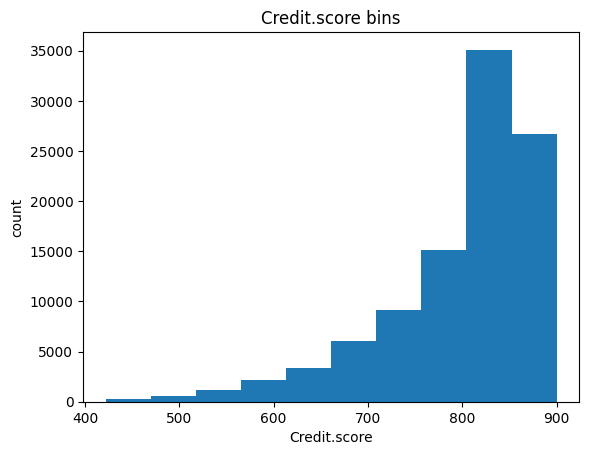

In [104]:
plt.pyplot.hist(contract_data["Credit.score"])

# set x/y labels and plot title
plt.pyplot.xlabel("Credit.score")
plt.pyplot.ylabel("count")
plt.pyplot.title("Credit.score bins")

Nous aimerions avoir 3 bacs d'une largeur de bande de taille égale, nous utilisons donc la fonction numpy linspace(start_value, end_value, numbers_generated

Comme nous voulons inclure la valeur minimale de la puissance, nous devons définir start_value=min(df["Credit.score"]).

Comme nous voulons inclure la valeur maximale de la puissance, nous devons définir end_value=max(df["Credit.score"]).

Puisque nous construisons 3 bacs de même longueur, il devrait y avoir 4 diviseurs, donc numbers_generated=4.

Nous construisons un tableau de cases, d'une valeur minimale à une valeur maximale, avec la largeur de bande calculée ci-dessus. Les cellules seront les valeurs utilisées pour déterminer quand une cellule se termine et quand une autre commence.

In [108]:
bins = np.linspace(min(contract_data["Credit.score"]), max(contract_data["Credit.score"]), 4)
bins 
group_names = ['Low', 'Medium', 'High']

La plupart des créanciers accordent une importance particulière aux scores de crédit de 780 ou plus et proposent les meilleurs taux possibles à ces emprunteurs. Les emprunteurs dont le score se situe entre 720 et 780 obtiennent également des taux d'intérêt plus bas et sont considérés comme d'excellents candidats par les prêteurs. Les scores compris entre 660 et 719 sont également respectables et permettent d'obtenir la plupart des prêts; cependant, ces personnes se voient appliquer des taux plus élevés.

Un score inférieur à 660 limitera vos options à quelques programmes spécifiques et vous obligera à payer des taux d'intérêt plus élevés. Les personnes ayant un score de crédit de 580 ou moins risquent de ne pas voir leur prêt approuvé. Si leur demande est acceptée, elles devront probablement faire face à des taux d'intérêt très élevés. https://assurancemortgage.com/credit-score-determined/#:~:text=Credit%20scores%20fall%20within%20a,cost%20of%20private%20mortgage%20insurance.

In [109]:
contract_data['Credit_score_cat'] = pd.cut(contract_data['Credit.score'], bins, labels=group_names, include_lowest=True )
contract_data[['Credit.score','Credit_score_cat']].head(20)

Credit.score Credit_score_cat
0            491              Low
1            730           Medium
2            689           Medium
3            794             High
4            880             High
5            839             High
6            900             High
7            821             High
8            820             High
9            850             High
10           687           Medium
11           601           Medium
12           701           Medium
13           673           Medium
14           841             High
15           900             High
16           728           Medium
17           850             High
18           725           Medium
19           846             High

In [113]:
contract_data['Credit_score_cat'].value_counts()

High      80422
Medium    16700
Low        2696
Name: Credit_score_cat, dtype: int64

In [110]:
group_names = ['High', 'Medium', 'Low']

Text(0.5, 1.0, 'Credit_score_categories')

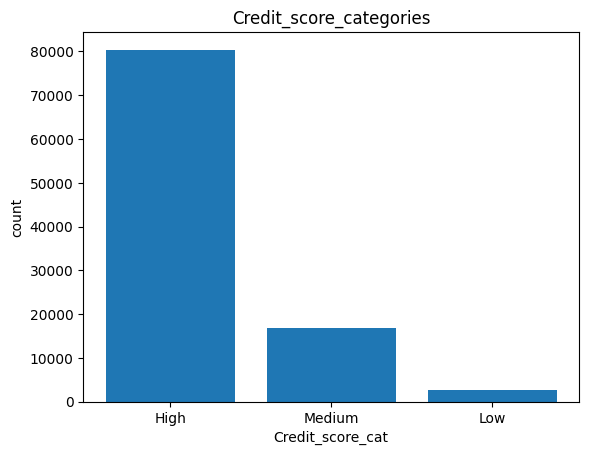

In [111]:

pyplot.bar(group_names, contract_data["Credit_score_cat"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Credit_score_cat")
plt.pyplot.ylabel("count")
plt.pyplot.title("Credit_score_categories")

In [112]:
contract_data[contract_data['Credit_score_cat']=='Low']

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
0       121744       365           59      Female        5   Single  Private   
36      125274       361           29      Female       10  Married  Commute   
41      158230       365           29        Male       10  Married  Private   
49      165967       365           53        Male        8  Married  Commute   
154     129597       366           29        Male        0  Married  Commute   
...        ...       ...          ...         ...      ...      ...      ...   
100277  142307       366           44        Male        5   Single  Private   
100311  164716       365           31        Male       14  Married  Commute   
100332  173097       365           51        Male        8  Married  Private   
100342  187382       182           54        Male        9   Single  Private   
100385  207721       366           23      Female        1   Single  Commute   

        Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  \
0                491  Urban           12427.420              40         77   
36               577  Urban            9320.565              13         52   
41               499  Urban            6213.710              13         61   
49               573  Rural           12427.420              36         38   
154              505  Urban            6213.710              12         18   
...              ...    ...                 ...             ...        ...   
100277           557  Urban           12427.420              15         38   
100311           490  Urban            6213.710               5         13   
100332           480  Urban            6213.710              11         18   
100342           543  Rural            6213.710              38         89   
100385           553  Urban           12427.420               5         18   

       Credit_score_cat  
0                   Low  
36                  Low  
41                  Low  
49                  Low  
154                 Low  
...                 ...  
100277              Low  
100311              Low  
100332              Low  
100342              Low  
100385              Low  

[2696 rows x 13 columns]

Text(0.5, 1.0, 'histogramme montrant la distribution des données de Years.noclaims')

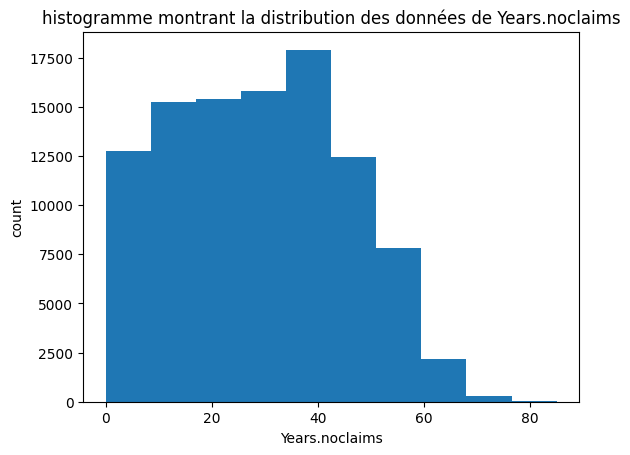

In [114]:
#histogramme montrant la distribution des données de AMT_Claim

plt.pyplot.hist(contract_data["Years.noclaims"])

# set x/y labels and plot title
plt.pyplot.xlabel("Years.noclaims")
plt.pyplot.ylabel("count")
plt.pyplot.title("histogramme montrant la distribution des données de Years.noclaims")


Text(0.5, 0, 'nombre d années sans réclamations')

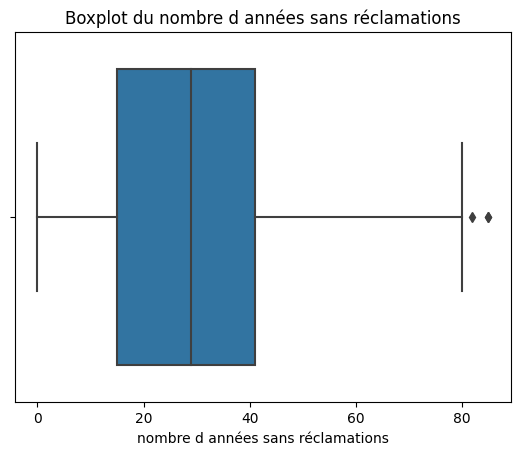

In [115]:
#boîte à moustache du montant des sinistres
sns.boxplot(x=contract_data["Years.noclaims"])
plt.pyplot.title('Boxplot du nombre d années sans réclamations')
plt.pyplot.xlabel('nombre d années sans réclamations')


In [116]:
Q1 = contract_data["Years.noclaims"].quantile(0.25)
Q3 = contract_data["Years.noclaims"].quantile(0.75)
IQR = Q3 - Q1

# Calcul du seuil au-delà duquel une valeur est considérée comme une valeur aberrante
outlier_threshold = Q3 + 1.5 * IQR

# Identification les valeurs aberrantes
outliers = contract_data[contract_data["Years.noclaims"] > outlier_threshold]

# Calcul du pourcentage des valeurs aberrantes par rapport au total des observations
percentage_outliers = (len(outliers) / len(contract_data)) * 100

print(f"Pourcentage de valeurs aberrantes : {percentage_outliers:.2f}%")

Pourcentage de valeurs aberrantes : 0.00%


In [119]:
#Retirer les outliers s'il y'en a 
contract_data = contract_data[contract_data["Years.noclaims"] <= outlier_threshold]


Text(0.5, 1.0, 'histogramme montrant la distribution des données de Annual.miles.drive')

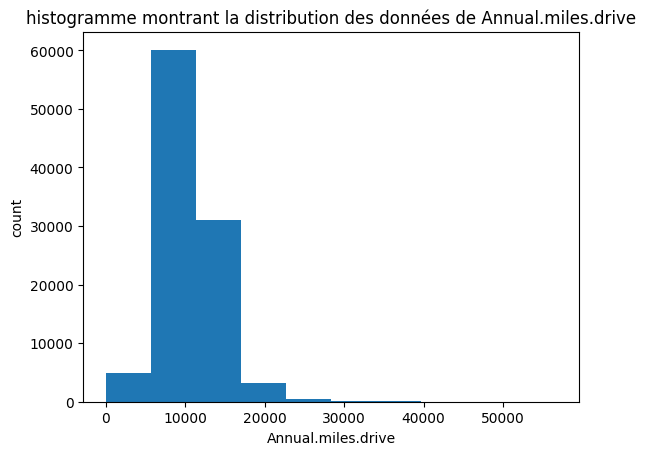

In [120]:
#histogramme montrant la distribution des données de AMT_Claim

plt.pyplot.hist(contract_data["Annual.miles.drive"])

# set x/y labels and plot title
plt.pyplot.xlabel("Annual.miles.drive")
plt.pyplot.ylabel("count")
plt.pyplot.title("histogramme montrant la distribution des données de Annual.miles.drive")


Text(0.5, 0, 'nombre de miles parcourus par année')

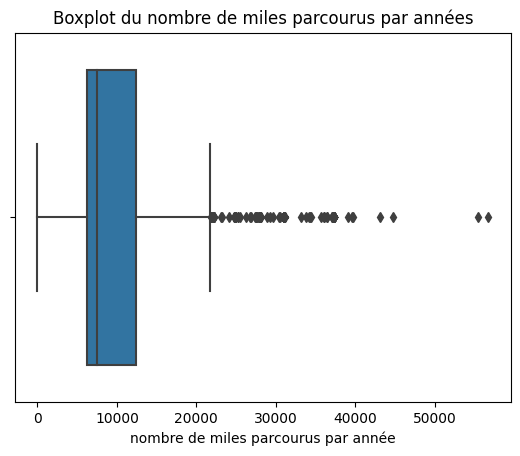

In [121]:
#boîte à moustache du montant des sinistres
sns.boxplot(x=contract_data["Annual.miles.drive"])
plt.pyplot.title('Boxplot du nombre de miles parcourus par années')
plt.pyplot.xlabel('nombre de miles parcourus par année')


In [122]:
Q1 = contract_data["Annual.miles.drive"].quantile(0.25)
Q3 = contract_data["Annual.miles.drive"].quantile(0.75)
IQR = Q3 - Q1

# Calcul du seuil au-delà duquel une valeur est considérée comme une valeur aberrante
outlier_threshold = Q3 + 1.5 * IQR

# Identification les valeurs aberrantes
outliers = contract_data[contract_data["Annual.miles.drive"] > outlier_threshold]

# Calcul du pourcentage des valeurs aberrantes par rapport au total des observations
percentage_outliers = (len(outliers) / len(contract_data)) * 100

print(f"Pourcentage de valeurs aberrantes : {percentage_outliers:.2f}%")

Pourcentage de valeurs aberrantes : 0.64%


In [125]:

#Retirer les outliers s'il y'en a 
contract_data = contract_data[contract_data["Annual.miles.drive"] <= outlier_threshold]


In [127]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99174 entries, 0 to 100398
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Id_pol              99174 non-null  object  
 1   Duration            99174 non-null  int64   
 2   Insured.age         99174 non-null  int64   
 3   Insured.sex         99174 non-null  object  
 4   Car.age             99174 non-null  int64   
 5   Marital             99174 non-null  object  
 6   Car.use             99174 non-null  object  
 7   Credit.score        99174 non-null  int64   
 8   Region              99174 non-null  object  
 9   Annual.miles.drive  99174 non-null  float64 
 10  Years.noclaims      99174 non-null  int64   
 11  Territory           99174 non-null  int64   
 12  Credit_score_cat    99174 non-null  category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 9.9+ MB


In [128]:
contract_data.describe()

Duration   Insured.age       Car.age  Credit.score  \
count  99174.000000  99174.000000  99174.000000  99174.000000   
mean     314.025571     51.409755      5.648134    801.082794   
std       79.855783     15.485710      4.063589     83.320600   
min        0.000000     16.000000     -2.000000    422.000000   
25%      199.000000     39.000000      2.000000    766.000000   
50%      365.000000     51.000000      5.000000    825.000000   
75%      366.000000     64.000000      8.000000    856.000000   
max      366.000000    103.000000     20.000000    900.000000   

       Annual.miles.drive  Years.noclaims     Territory  
count        99174.000000    99174.000000  99174.000000  
mean          9007.422186       28.882257     56.489433  
std           3538.078035       16.170802     24.028217  
min              0.000000        0.000000     11.000000  
25%           6213.710000       15.000000     35.000000  
50%           7456.452000       29.000000     62.000000  
75%          12427.420000       41.000000     78.000000  
max          21747.985000       80.000000     91.000000

In [135]:
contract_data['Credit_score_cat'] = contract_data['Credit_score_cat'].astype(str)

In [136]:
contract_data.describe(include='object')

Id_pol Insured.sex  Marital  Car.use Region Credit_score_cat
count    99174       99174    99174    99174  99174            99174
unique   99174           2        2        4      2                3
top     121744        Male  Married  Commute  Urban             High
freq         1       53421    69384    49329  77607            79960

### Analyse des Statistiques Descriptives

#### Variables Numériques
- **Duration (Durée)**:
  - **Moyenne**: 314 jours, ce qui indique que la plupart des contrats sont presque complets.
  - **Écart-Type**: 79,86 jours, suggérant une certaine variation dans les durées.
  - **Minimale/Moyenne/Médiane/Maximale**: La durée varie de 0 à 366 jours, indiquant que certains contrats sont très courts.

- **Insured.age (Âge de l'assuré)**:
  - **Moyenne**: 51,41 ans, ce qui représente un groupe d'âge relativement mature.
  - **Écart-Type**: 15,49, indiquant une dispersion notable entre les âges.
  - **Extrêmes**: L'âge varie entre 16 et 103 ans.

- **Car.age (Âge du véhicule)**:
  - **Moyenne**: 5,65 ans, ce qui suggère des véhicules relativement récents.
  - **Écart-Type**: 4,06, indiquant des véhicules de différentes générations.
  - **Extrêmes**: Les âges varient de -2  à 20 ans.
  
  L'âge négatif indique que l'utilisateur a acheté un véhicule qu'il n'a pas encore utilisé. Nous retirerons donc ces valeurs si non significatives dans l'echantillon global.

- **Credit.score (Score de crédit)**:
  - **Moyenne**: 801,08, ce qui indique un score de crédit généralement bon.
  - **Écart-Type**: 83,32, signifiant des variations entre les individus.
  - **Extrêmes**: Les scores varient entre 422 et 900.

- **Annual.miles.drive (Distance annuelle parcourue)**:
  - **Moyenne**: 9007,42 miles par an.
  - **Écart-Type**: 3538,08, indiquant des variations importantes dans la conduite.
  - **Extrêmes**: Variations de 0 à 21 748 miles.

- **Years.noclaims (Années sans sinistre)**:
  - **Moyenne**: 28,88 années sans sinistre.
  - **Écart-Type**: 16,17, ce qui suggère une grande diversité d'expérience.
  - **Extrêmes**: Variations de 0 à 80 ans.

- **Territory**:
  - **Moyenne**: 56,49, couvrant plusieurs territoires.

#### Variables Catégoriques
- **Id_pol (ID du contrat)**:
  - Chaque contrat est unique.

- **Insured.sex (Sexe de l'assuré)**:
  - **Top**: `Male` (Homme), le sexe le plus représenté, représentant 53 421 individus sur 99 174.

- **Marital (Statut marital)**:
  - **Top**: `Married` (Marié), avec 69 384 individus.

- **Car.use (Utilisation du véhicule)**:
  - **Top**: `Commute`, le motif le plus courant.

- **Region (Région)**:
  - **Top**: `Urban`, la majorité des assurés vivent en zone urbaine.

- **Credit_score_cat (Catégorie du score de crédit)**:
  - **Top**: `High`, 79 960 assurés ayant un score élevé.

### Interprétation Générale
- **Risques de Sinistre**: Les années sans sinistre et les scores de crédit suggèrent une population globalement prudente, mais le comportement varie.
- **Véhicules et Âge**: Les véhicules sont relativement récents, et les conducteurs couvrent un large éventail d'âges.
- **Statut Marital et Région**: La majorité des conducteurs sont mariés et vivent en zone urbaine, ce qui pourrait influencer les comportements et le risque.

In [137]:
# Identifier les valeurs négatives dans la colonne `Car.age`
negative_values = contract_data[contract_data['Car.age'] < 0]

# Calculer le pourcentage des valeurs négatives dans l'ensemble du DataFrame
total_rows = len(contract_data)
negative_count = len(negative_values)
negative_percentage = (negative_count / total_rows) * 100

# Afficher le résultat
print(f"Nombre de valeurs négatives dans `Car.age`: {negative_count}")
print(f"Pourcentage de valeurs négatives dans le DataFrame: {negative_percentage:.2f}%")


Nombre de valeurs négatives dans `Car.age`: 1919
Pourcentage de valeurs négatives dans le DataFrame: 1.93%


In [138]:
# Filtrer les lignes qui ont des valeurs négatives dans `Car.age`
contract_data = contract_data[contract_data['Car.age'] >= 0]

In [139]:
contract_data.isnull().sum()

Id_pol                0
Duration              0
Insured.age           0
Insured.sex           0
Car.age               0
Marital               0
Car.use               0
Credit.score          0
Region                0
Annual.miles.drive    0
Years.noclaims        0
Territory             0
Credit_score_cat      0
dtype: int64

Text(0.5, 0, 'âge des véhicules assurés')

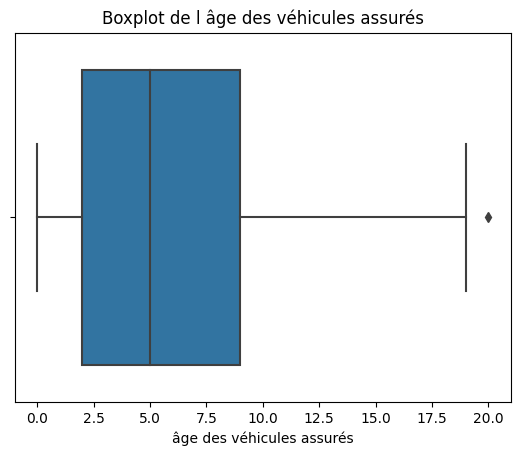

In [140]:
#boîte à moustache du montant des sinistres
sns.boxplot(x=contract_data["Car.age"])
plt.pyplot.title('Boxplot de l âge des véhicules assurés')
plt.pyplot.xlabel('âge des véhicules assurés')


In [141]:
Q1 = contract_data["Car.age"].quantile(0.25)
Q3 = contract_data["Car.age"].quantile(0.75)
IQR = Q3 - Q1

# Calcul du seuil au-delà duquel une valeur est considérée comme une valeur aberrante
outlier_threshold = Q3 + 1.5 * IQR

# Identification les valeurs aberrantes
outliers = contract_data[contract_data["Car.age"] > outlier_threshold]

# Calcul du pourcentage des valeurs aberrantes par rapport au total des observations
percentage_outliers = (len(outliers) / len(contract_data)) * 100

print(f"Pourcentage de valeurs aberrantes : {percentage_outliers:.2f}%")
#Retirer les outliers s'il y'en a 
contract_data = contract_data[contract_data["Car.age"] <= outlier_threshold]


Pourcentage de valeurs aberrantes : 0.00%


In [142]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97254 entries, 0 to 100397
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id_pol              97254 non-null  object 
 1   Duration            97254 non-null  int64  
 2   Insured.age         97254 non-null  int64  
 3   Insured.sex         97254 non-null  object 
 4   Car.age             97254 non-null  int64  
 5   Marital             97254 non-null  object 
 6   Car.use             97254 non-null  object 
 7   Credit.score        97254 non-null  int64  
 8   Region              97254 non-null  object 
 9   Annual.miles.drive  97254 non-null  float64
 10  Years.noclaims      97254 non-null  int64  
 11  Territory           97254 non-null  int64  
 12  Credit_score_cat    97254 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 10.4+ MB


### Prétraitement et EDA de `telematics_data`

Cette base de données contient des informations télématiques sur le comportement des conducteurs, fournissant des insights sur les risques potentiels liés à la conduite. Voici une explication des variables :

1. **Id_pol** : Identifiant unique de la police d'assurance, pour faire le lien avec les autres bases.

2. **Annual.pct.driven** : Pourcentage annuel du temps pendant lequel le véhicule est conduit.

3. **Total.miles.driven** : Distance totale parcourue par le véhicule pendant la période de couverture.

4. **Pct.drive.mon/tue/wed/thr/fri/sat/sun** : Pourcentage de conduite effectué chaque jour de la semaine.

5. **Pct.drive.2hrs/3hrs/4hrs** : Pourcentage de conduite effectué pendant des intervalles horaires spécifiques.

6. **Pct.drive.wkday/wkend** : Pourcentage de conduite pendant les jours de semaine (lundi-vendredi) et le week-end.

7. **Pct.drive.rush am/pm** : Pourcentage de conduite pendant les heures de pointe du matin ou de l'après-midi.

8. **Avgdays.week** : Moyenne du nombre de jours de conduite par semaine.

9. **Accel.xxmiles/Brake.xxmiles** : Nombre d'accélérations ou de freinages brusques par 1000 miles, indiquant un comportement agressif.

10. **Left.turn.intensityxx/Right.turn.intensityxx** : Nombre de virages à gauche ou à droite à intensité élevée par 1000 miles.


In [143]:
telematics_data.dtypes

Id_pol                     object
Annual.pct.driven          object
Total.miles.driven         object
Pct.drive.mon              object
Pct.drive.tue              object
Pct.drive.wed              object
Pct.drive.thr              object
Pct.drive.fri              object
Pct.drive.sat              object
Pct.drive.sun              object
Pct.drive.2hrs             object
Pct.drive.3hrs             object
Pct.drive.4hrs             object
Pct.drive.wkday            object
Pct.drive.wkend            object
Pct.drive.rush am          object
Pct.drive.rush pm          object
Avgdays.week               object
Accel.06miles             float64
Accel.08miles             float64
Accel.09miles             float64
Accel.11miles             float64
Accel.12miles             float64
Accel.14miles             float64
Brake.06miles             float64
Brake.08miles             float64
Brake.09miles             float64
Brake.11miles             float64
Brake.12miles             float64
Brake.14miles 

In [144]:
telematics_data.isnull().sum()

Id_pol                    0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct.drive.sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles             0
Brake.08miles             0
Brake.09miles             0
Brake.11miles             0
Brake.12miles             0
Brake.14miles             0
Left.turn.intensity08     0
Left.turn.intensity09     0
Left.turn.intensity10     0
Left.turn.intensity11     0
Left.turn.intensity12     0
Right.turn.intensity

In [145]:
telematics_data

Id_pol Annual.pct.driven Total.miles.driven Pct.drive.mon  \
0       cnt_122389       0,997260274        5372,837273   0,192885196   
1       cnt_125019       0,912328767        5780,818246   0,103235423   
2       cnt_181154       0,526027397        9149,738331   0,116469365   
3       cnt_140021                 1        10582,26663   0,144175656   
4       cnt_170356        0,75890411        9412,021708   0,109676276   
...            ...               ...                ...           ...   
100327  cnt_215461        0,22739726        1805,053586   0,069532689   
100328  cnt_206415       0,961643836        4513,087229   0,152835123   
100329  cnt_187472       0.498630137  7645.396934038791   0.119524428   
100330  cnt_193966       0.983561644   9354.42693575792   0.072627342   
100331  cnt_129620       0,304109589        2013,059079   0,095567553   

       Pct.drive.tue Pct.drive.wed Pct.drive.thr Pct.drive.fri Pct.drive.sat  \
0        0,169068979   0,197889028   0,184917416    0,16189224   0,056223054   
1         0,11866897   0,107923307   0,137310889   0,174103462   0,203041338   
2        0,145887688    0,13527532   0,173257616   0,160496263   0,084183125   
3        0,151476187   0,168558752   0,171549272   0,177907998   0,114748693   
4        0,152352793   0,151707136   0,160847296   0,140824794   0,151463464   
...              ...           ...           ...           ...           ...   
100327   0,199659464   0,106125289   0,278542941   0,202474321   0,103859745   
100328   0,153833202   0,105779641   0,155288418   0,123644011   0,180593479   
100329   0.140343686   0.131523148   0.142210447    0.10569621   0.268427804   
100330   0.147821284   0.198007487    0.10910057   0.180183148   0.192656561   
100331   0,144426148   0,146339543   0,151470482   0,190755191   0,125101541   

       Pct.drive.sun  ... Left.turn.intensity08 Left.turn.intensity09  \
0        0,037124086  ...                2366.0                1609.0   
1        0,155716612  ...                   4.0                   1.0   
2        0,184430624  ...                   0.0                   0.0   
3        0,071583442  ...                 736.0                 295.0   
4        0,133128241  ...                  33.0                  12.0   
...              ...  ...                   ...                   ...   
100327   0,039805551  ...                  29.0                   6.0   
100328   0,128026127  ...                  60.0                  14.0   
100329   0.092274277  ...                  81.0                  21.0   
100330   0.099603607  ...                 329.0                 180.0   
100331   0,146339542  ...                  50.0                  11.0   

       Left.turn.intensity10 Left.turn.intensity11 Left.turn.intensity12  \
0                      751.0                 339.0                 107.0   
1                        0.0                   0.0                   0.0   
2                        0.0                   0.0                   0.0   
3                       58.0                  16.0                   6.0   
4                        2.0                   1.0                   0.0   
...                      ...                   ...                   ...   
100327                   0.0                   0.0                   0.0   
100328                   2.0                   1.0                   0.0   
100329                   2.0                   0.0                   0.0   
100330                  71.0                  35.0                  17.0   
100331                   0.0                   0.0                   0.0   

       Right.turn.intensity08 Right.turn.intensity09 Right.turn.intensity10  \
0                       766.0                  366.0                   91.0   
1                         5.0                    0.0                    0.0   
2                         0.0                    0.0                    0.0   
3                       656.0                  294.0                

In [146]:
#on retire cnt_ de Id_pol afin de l'uniformiser avec les autres dataset
telematics_data['Id_pol'] = telematics_data['Id_pol'].str.replace('cnt_','')

In [150]:
df_telematics=telematics_data

In [151]:
#convertir toutes les colonnes en object
columns=df_telematics.columns.to_list()
for column in columns:
    df_telematics[column] = df_telematics[column].astype(str)
    
#remplacer les , par . dans df_telematics
for column in columns:
    df_telematics[column] = df_telematics[column].str.replace(',','.')

#convertir toues les colonnes en float sauf id
for column in columns:
    if column != 'Id_pol':
        df_telematics[column] = df_telematics[column].astype(float)
    

In [152]:
#identifier les lignes où toutes colonnes sont nulles exceptées la colonne Id
zero_rows = df_telematics[((df_telematics.iloc[:,1:] == 0)|(df_telematics.iloc[:,1:] == 0.0)).all(axis=1)]
zero_rows

Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
243    209918                0.0                 0.0            0.0   
480    138604                0.0                 0.0            0.0   
1890   168245                0.0                 0.0            0.0   
2836   181365                0.0                 0.0            0.0   
3956   172860                0.0                 0.0            0.0   
...       ...                ...                 ...            ...   
91365  184282                0.0                 0.0            0.0   
91742  155703                0.0                 0.0            0.0   
92274  196975                0.0                 0.0            0.0   
96242  178232                0.0                 0.0            0.0   
99534  194154                0.0                 0.0            0.0   

       Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  \
243              0.0            0.0            0.0            0.0   
480              0.0            0.0            0.0            0.0   
1890             0.0            0.0            0.0            0.0   
2836             0.0            0.0            0.0            0.0   
3956             0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
91365            0.0            0.0            0.0            0.0   
91742            0.0            0.0            0.0            0.0   
92274            0.0            0.0            0.0            0.0   
96242            0.0            0.0            0.0            0.0   
99534            0.0            0.0            0.0            0.0   

       Pct.drive.sat  Pct.drive.sun  ...  Left.turn.intensity08  \
243              0.0            0.0  ...                    0.0   
480              0.0            0.0  ...                    0.0   
1890             0.0            0.0  ...                    0.0   
2836             0.0            0.0  ...                    0.0   
3956             0.0            0.0  ...                    0.0   
...              ...            ...  ...                    ...   
91365            0.0            0.0  ...                    0.0   
91742            0.0            0.0  ...                    0.0   
92274            0.0            0.0  ...                    0.0   
96242            0.0            0.0  ...                    0.0   
99534            0.0            0.0  ...                    0.0   

       Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  \
243                      0.0                    0.0                    0.0   
480                      0.0                    0.0                    0.0   
1890                     0.0                    0.0                    0.0   
2836                     0.0                    0.0                    0.0   
3956                     0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
91365                    0.0                    0.0                    0.0   
91742                    0.0                    0.0                    0.0   
92274                    0.0                    0.0                    0.0   
96242                    0.0                    0.0                    0.0   
99534                    0.0                    0.0                    0.0   

       Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  \
243                      0.0                     0.0                     0.0   
480                      0.0                     0.0                     0.0   
1890                     0.0                     0.0                     0.0   
2836                     0.0                     0.0                     0.0   
3956                     0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
91365                  

In [153]:
df_telematics = df_telematics.drop(zero_rows.index)


In [154]:
df_telematics

Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
0       122389           0.997260         5372.837273       0.192885   
1       125019           0.912329         5780.818246       0.103235   
2       181154           0.526027         9149.738331       0.116469   
3       140021           1.000000        10582.266630       0.144176   
4       170356           0.758904         9412.021708       0.109676   
...        ...                ...                 ...            ...   
100327  215461           0.227397         1805.053586       0.069533   
100328  206415           0.961644         4513.087229       0.152835   
100329  187472           0.498630         7645.396934       0.119524   
100330  193966           0.983562         9354.426936       0.072627   
100331  129620           0.304110         2013.059079       0.095568   

        Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  \
0            0.169069       0.197889       0.184917       0.161892   
1            0.118669       0.107923       0.137311       0.174103   
2            0.145888       0.135275       0.173258       0.160496   
3            0.151476       0.168559       0.171549       0.177908   
4            0.152353       0.151707       0.160847       0.140825   
...               ...            ...            ...            ...   
100327       0.199659       0.106125       0.278543       0.202474   
100328       0.153833       0.105780       0.155288       0.123644   
100329       0.140344       0.131523       0.142210       0.105696   
100330       0.147821       0.198007       0.109101       0.180183   
100331       0.144426       0.146340       0.151470       0.190755   

        Pct.drive.sat  Pct.drive.sun  ...  Left.turn.intensity08  \
0            0.056223       0.037124  ...                 2366.0   
1            0.203041       0.155717  ...                    4.0   
2            0.084183       0.184431  ...                    0.0   
3            0.114749       0.071583  ...                  736.0   
4            0.151463       0.133128  ...                   33.0   
...               ...            ...  ...                    ...   
100327       0.103860       0.039806  ...                   29.0   
100328       0.180593       0.128026  ...                   60.0   
100329       0.268428       0.092274  ...                   81.0   
100330       0.192657       0.099604  ...                  329.0   
100331       0.125102       0.146340  ...                   50.0   

        Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  \
0                      1609.0                  751.0                  339.0   
1                         1.0                    0.0                    0.0   
2                         0.0                    0.0                    0.0   
3                       295.0                   58.0                   16.0   
4                        12.0                    2.0                    1.0   
...                       ...                    ...                    ...   
100327                    6.0                    0.0                    0.0   
100328                   14.0                    2.0                    1.0   
100329                   21.0                    2.0                    0.0   
100330                  180.0                   71.0                   35.0   
100331                   11.0                    0.0                    0.0   

        Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  \
0                       107.0                   766.0                   366.0   
1                         0.0                     5.0                     0.0   
2                         0.0                     0.0                     0.0   
3                         6.0                   656.0                   294.0   
4                         0.0                    39.0                    14.0   
...                       ...                     

In [155]:
df_telematics.duplicated().sum()

0

In [174]:
#doublons d'id dans telematics
df_telematics.duplicated(subset='Id_pol', keep = False).sum()

0

In [157]:
correlation_matrix = df_telematics.corr()
correlation_matrix

/var/folders/df/tzlk6_xs46dbdsn2dm2mr21m0000gp/T/ipykernel_31415/4017656363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_telematics.corr()


Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
Annual.pct.driven                1.000000            0.704461      -0.031258   
Total.miles.driven               0.704461            1.000000      -0.018220   
Pct.drive.mon                   -0.031258           -0.018220       1.000000   
Pct.drive.tue                   -0.079482           -0.076961       0.037895   
Pct.drive.wed                    0.029752           -0.000104      -0.104962   
Pct.drive.thr                    0.019441            0.003514      -0.157207   
Pct.drive.fri                    0.009530            0.006809      -0.200075   
Pct.drive.sat                    0.027850            0.038366      -0.283430   
Pct.drive.sun                    0.020809            0.039281      -0.184472   
Pct.drive.2hrs                   0.009092            0.101168      -0.028253   
Pct.drive.3hrs                  -0.008026            0.025463      -0.012991   
Pct.drive.4hrs                  -0.012135            0.000307      -0.004247   
Pct.drive.wkday                 -0.030240           -0.048166       0.292165   
Pct.drive.wkend                  0.030240            0.048166      -0.292165   
Pct.drive.rush am                0.041833            0.149190       0.062875   
Pct.drive.rush pm                0.031206            0.133927       0.003427   
Avgdays.week                     0.028967            0.311302       0.024599   
Accel.06miles                   -0.054877           -0.135776       0.029286   
Accel.08miles                   -0.042181           -0.069124       0.043344   
Accel.09miles                   -0.031396           -0.044721       0.042988   
Accel.11miles                   -0.024662           -0.033481       0.024143   
Accel.12miles                   -0.020303           -0.026674       0.010031   
Accel.14miles                   -0.016064           -0.022071       0.009596   
Brake.06miles                   -0.065983           -0.140038       0.012922   
Brake.08miles                   -0.050147           -0.086884       0.020331   
Brake.09miles                   -0.034407           -0.051973       0.017390   
Brake.11miles                   -0.023414           -0.033626       0.017509   
Brake.12miles                   -0.020023           -0.027621       0.011795   
Brake.14miles                   -0.015839           -0.022114       0.005773   
Left.turn.intensity08            0.007252            0.006657       0.004339   
Left.turn.intensity09            0.006252            0.006657       0.003263   
Left.turn.intensity10            0.005178            0.006823       0.001951   
Left.turn.intensity11            0.004885            0.006897       0.001249   
Left.turn.intensity12            0.004638            0.006824       0.000957   
Right.turn.intensity08           0.007170            0.001672      -0.006080   
Right.turn.intensity09           0.003169            0.001321      -0.006665   
Right.turn.intensity10          -0.000133            0.000804      -0.006420   
Right.turn.intensity11          -0.001677            0.000206      -0.006125   
Right.turn.intensity12          -0.002218            0.000124      -0.004985   

                        Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  \
Annual.pct.driven           -0.079482       0.029752       0.019441   
Total.miles.driven          -0.076961      -0.000104       0.003514   
Pct.drive.mon                0.037895      -0.104962      -0.157207   
Pct.drive.tue                1.000000       0.030840      -0.068995   
Pct.drive.wed                0.030840       1.000000       0.072284   
Pct.drive.thr               -0.068995       0.072284       1.000000   
Pct.drive.fri               -0.207812      -0.145688      -0.047950   
Pct.drive.sat               -0.388534      -0.379189      -0.348040   
Pct.drive.sun               -0.357595      -0.366773      -0.341694   
Pct.drive.2hrs              -0.041535      -0.031529      -0.019974   
Pct.drive.3hrs              -0.012925     

/var/folders/df/tzlk6_xs46dbdsn2dm2mr21m0000gp/T/ipykernel_31415/3528809444.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_telematics.corr()


<AxesSubplot: >

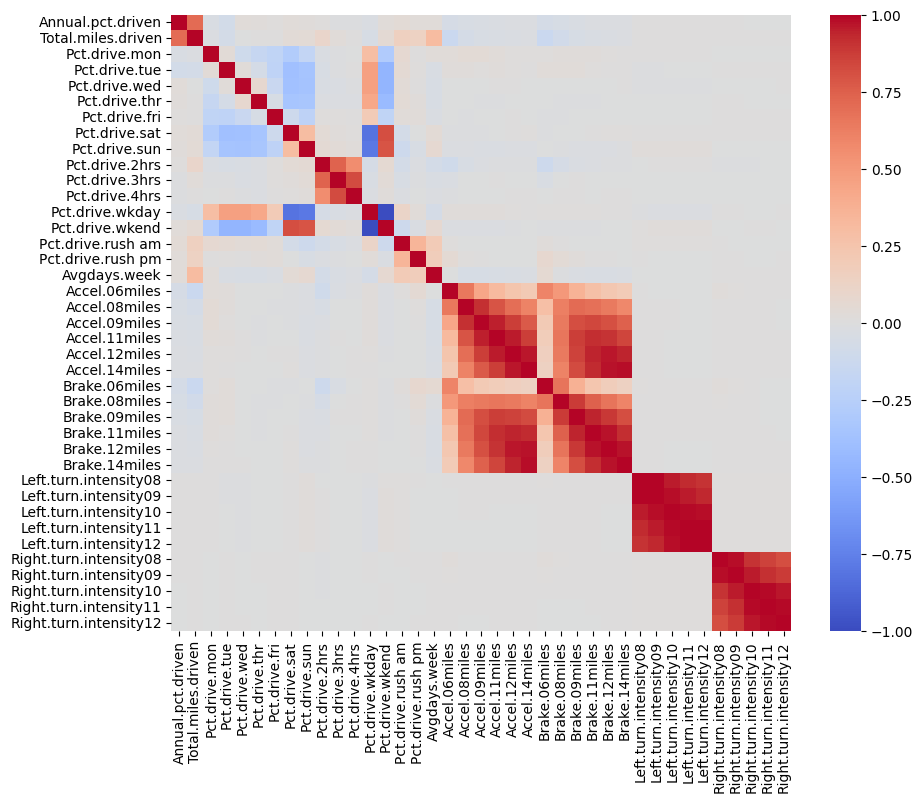

In [159]:
# Matrice de corrélation
corr = df_telematics.corr()
plt.pyplot.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')


Réduction de la Dimensionnalité:
PCA (Analyse en Composantes Principales): Transforme les variables corrélées en un ensemble de composantes orthogonales.

PCA:
La PCA permet d' obtenir un nombre réduit de composants principaux qui capturent la variance maximale.

Ce dataframe contient un nombre important de variables, une PCA s'avère donc nécessaire pour réduire la dimensionalité.

In [175]:
telematics_data_cleaned = df_telematics.drop(columns=['Id_pol'])


[0.66492604 0.28284801 0.01961286 0.01693167 0.01267619]


In [ ]:
# Application de la PCA avec 5 composantes
pca = PCA(n_components=5)  
principal_components = pca.fit_transform(telematics_data_cleaned)

# Créer un nouveau DataFrame avec les composants principaux
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(principal_components.shape[1])])

# Ajouter la colonne d'identifiant
pca_df['Id_pol'] = df_telematics['Id_pol']

# Afficher la variance expliquée par chaque composant
print(pca.explained_variance_ratio_)


In [176]:
pca_df

Principal Component 1  Principal Component 2  Principal Component 3  \
0                 1001.992034            -407.119361            1429.511131   
1                -1429.848025           -1006.339639            -288.685999   
2                -1429.033707           -1008.267614            -295.536559   
3                 -889.715623            -494.038047             246.334017   
4                -1405.428457            -980.589657            -271.708546   
...                       ...                    ...                    ...   
100232           -1418.279638            -940.819818            -266.059903   
100233           -1390.141918            -561.876973            -244.585027   
100234           -1379.114710            -913.953171            -235.814844   
100235           -1128.441031            -809.746228             -62.584655   
100236           -1402.088029            -699.302034            -248.961785   

        Principal Component 4  Principal Component 5  Id_pol  
0                  124.484388             538.909846  122389  
1                 -398.008694             952.004223  125019  
2                 -371.885337            4320.838333  181154  
3                  109.552231            5749.156888  140021  
4                 -341.637462            4582.740700  170356  
...                       ...                    ...     ...  
100232            -360.702007           -3024.221335  169423  
100233               9.724265            -319.386773  220618  
100234            -290.311770            2815.759721  121277  
100235            -226.184442            4524.050168  128311  
100236            -107.314331           -2818.390122  122966  

[100237 rows x 6 columns]

In [164]:
# Interprétation des Composantes Principales

# Coefficients des composantes principales
coefficients = pd.DataFrame(pca.components_, columns=telematics_data_cleaned.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])

coefficients


Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  \
PC1       5.486049e-08            0.000974   3.418061e-09  -1.062283e-08   
PC2       2.949693e-08            0.000198  -1.243447e-08   1.376090e-08   
PC3       2.852297e-07           -0.001071   5.910671e-08  -3.830813e-08   
PC4       1.172500e-06            0.008974  -8.403893e-09   2.646671e-08   
PC5       4.641796e-05            0.999954  -1.406617e-07  -7.715523e-07   

     Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  \
PC1  -1.920969e-08  -8.870856e-09  -4.520741e-09   1.115283e-08   
PC2  -2.758853e-09   1.676397e-09   3.794782e-09   5.923755e-09   
PC3   2.412986e-08  -8.775589e-09   7.894142e-09  -4.295671e-08   
PC4  -4.979519e-08   7.120569e-08  -1.025162e-08  -2.434920e-08   
PC5   3.340905e-08   6.771673e-08   1.006224e-07   4.776924e-07   

     Pct.drive.sun  Pct.drive.2hrs  ...  Left.turn.intensity08  \
PC1   2.990910e-08    2.873503e-10  ...               0.484221   
PC2  -7.888692e-09   -3.519482e-09  ...              -0.005518   
PC3   7.356207e-09   -1.100623e-08  ...               0.613593   
PC4   1.065519e-08   -1.113052e-08  ...              -0.006721   
PC5   4.537400e-07    1.814364e-07  ...               0.000520   

     Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  \
PC1               0.471409               0.444691               0.425016   
PC2              -0.005728              -0.006427              -0.006830   
PC3               0.358830              -0.149383              -0.425030   
PC4              -0.005693               0.001286               0.005225   
PC5              -0.000303              -0.000792              -0.000787   

     Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  \
PC1               0.405855                0.007429                0.007010   
PC2              -0.006968                0.517702                0.488485   
PC3              -0.540022                0.007079                0.001957   
PC4               0.006567                0.626381                0.305213   
PC5              -0.000958               -0.005705               -0.002953   

     Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12  
PC1                0.006169                0.005477                0.004786  
PC2                0.434411                0.403544                0.376307  
PC3               -0.004235               -0.006110               -0.006643  
PC4               -0.236469               -0.433543               -0.519985  
PC5                0.002338                0.003578                0.004577  

[5 rows x 39 columns]

Text(0.5, 1.0, 'Contribution des Variables dans les Composantes Principales')

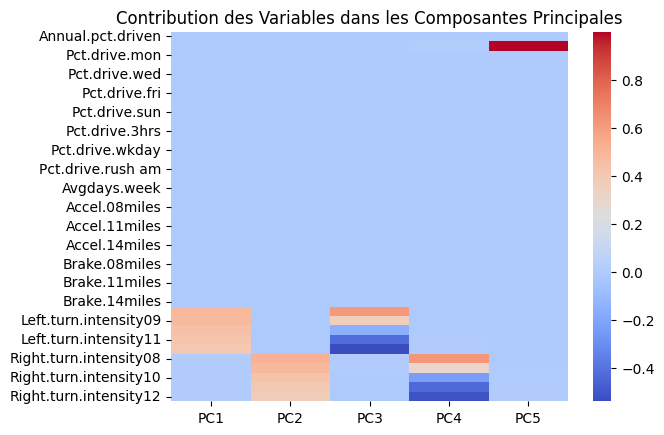

In [166]:
# Affichage des coefficients
sns.heatmap(coefficients.T, annot=False, cmap='coolwarm')
plt.pyplot.title("Contribution des Variables dans les Composantes Principales")



Ce graphique montre une carte thermique (heatmap) des contributions des différentes variables dans les composantes principales (PC1 à PC5). Cette visualisation permet de comprendre quelles variables contribuent le plus à chaque composante principale, aidant ainsi à l'interprétation de l'analyse en composantes principales (ACP). Voici une analyse détaillée :

### Analyse des Composantes Principales (ACP)

1. **PC1 (Première Composante Principale)**:
   - La variable **Annual.pct.driven** semble contribuer fortement et positivement à cette composante.
   - Cette variable reflète le pourcentage annuel de conduite, ce qui suggère que PC1 est liée à l'intensité d'utilisation du véhicule au fil du temps.

2. **PC2 (Deuxième Composante Principale)**:
   - Les variables **Left.turn.intensity** et **Right.turn.intensity** contribuent positivement.
   - PC2 pourrait être liée aux comportements de virage du conducteur, reflétant les habitudes d'utilisation du volant lors des manœuvres.

3. **PC3 (Troisième Composante Principale)**:
   - Les variables liées aux actions de freinage et d'accélération (par exemple, **Accel.08miles**, **Brake.08miles**) contribuent le plus à cette composante.
   - PC3 semble capturer les comportements agressifs ou prudents de conduite.

4. **PC4 (Quatrième Composante Principale)**:
   - La contribution principale provient des variables de freinage et de virages à droite.
   - PC4 pourrait représenter les manœuvres plus subtiles du conducteur.

5. **PC5 (Cinquième Composante Principale)**:
   - Les variables ne montrent pas de contribution dominante spécifique.
   - PC5 pourrait refléter des variations plus petites dans les comportements de conduite.




 Chaque composante semble capturer des comportements de conduite distincts, comme l'intensité de la conduite, les virages et les manœuvres de freinage/accélération.
 Les composantes principales simplifient les relations complexes entre les variables tout en conservant l'essence de l'information.


 Les assureurs peuvent utiliser ces composantes pour identifier les profils de conducteurs plus enclins à des accidents ou des réclamations.
 Cela pourrait améliorer les modèles prédictifs ou les algorithmes de tarification.


/Users/Abraham/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clusters par Composantes Principales')

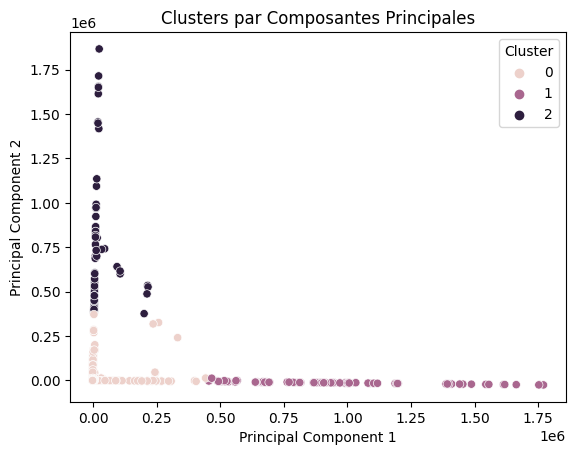

In [170]:
# Modélisation (Clustering K-means)
from sklearn.cluster import KMeans

# Créer et ajuster le modèle K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_components)

# Ajouter les étiquettes de cluster au DataFrame
pca_df['Cluster'] = kmeans.labels_

# Visualisation des clusters
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='Cluster')
plt.pyplot.title("Clusters par Composantes Principales")



In [178]:
pca_df.duplicated().sum()

0

In [177]:
pca_df.duplicated(subset='Id_pol', keep=False).sum()

95

In [200]:
# Remove duplicate rows based on 'Id_pol'
pca_df.drop_duplicates(subset='Id_pol', inplace=True)


In [201]:
#Vu que contract_data et df_telematics ont a peu près les mêmes volumétries nous allons les fusionner
# Fusionner sur l'identifiant unique `Id_pol`
final_df = pd.merge(pca_df, contract_data, on='Id_pol', how='inner')


In [202]:
final_df

Principal Component 1  Principal Component 2  Principal Component 3  \
0                1001.992034            -407.119361            1429.511131   
1               -1429.848025           -1006.339639            -288.685999   
2               -1429.033707           -1008.267614            -295.536559   
3                -889.715623            -494.038047             246.334017   
4               -1405.428457            -980.589657            -271.708546   
...                      ...                    ...                    ...   
96909           -1418.279638            -940.819818            -266.059903   
96910           -1390.141918            -561.876973            -244.585027   
96911           -1379.114710            -913.953171            -235.814844   
96912           -1128.441031            -809.746228             -62.584655   
96913           -1402.088029            -699.302034            -248.961785   

       Principal Component 4  Principal Component 5  Id_pol  Duration  \
0                 124.484388             538.909846  122389       366   
1                -398.008694             952.004223  125019       365   
2                -371.885337            4320.838333  181154       184   
3                 109.552231            5749.156888  140021       366   
4                -341.637462            4582.740700  170356       366   
...                      ...                    ...     ...       ...   
96909            -360.702007           -3024.221335  169423       226   
96910               9.724265            -319.386773  220618       236   
96911            -290.311770            2815.759721  121277       365   
96912            -226.184442            4524.050168  128311       366   
96913            -107.314331           -2818.390122  122966       365   

       Insured.age Insured.sex  Car.age  Marital     Car.use  Credit.score  \
0               36      Female        6  Married     Commute           859   
1               45        Male       11   Single     Private           833   
2               57      Female        5   Single     Commute           813   
3               43      Female        0   Single  Commercial           834   
4               25      Female       11   Single     Commute           867   
...            ...         ...      ...      ...         ...           ...   
96909           52        Male        7  Married     Commute           838   
96910           44      Female        6  Married     Commute           751   
96911           59        Male        5  Married     Commute           811   
96912           57      Female       12   Single     Private           684   
96913           42        Male        2   Single  Commercial           822   

      Region  Annual.miles.drive  Years.noclaims  Territory Credit_score_cat  
0      Urban            6213.710              20         39             High  
1      Urban            6213.710              29         13             High  
2      Urban           12427.420              40         83             High  
3      Rural           12427.420              27         69             High  
4      Rural            6213.710               8         90             High  
...      ...                 ...             ...        ...              ...  
96909  Urban           15534.275              32         12             High  
96910  Urban           12427.420              22         68             High  
96911  Urban           12427.420              39         76             High  
96912  Rural            6213.710              39         59           Medium  
96913  Urban           12427.420              25         26             High  

[96914 rows x 18 columns]

In [203]:
#On va définir Id_pol comme notre index
final_df.set_index('Id_pol')

Principal Component 1  Principal Component 2  Principal Component 3  \
Id_pol                                                                        
122389            1001.992034            -407.119361            1429.511131   
125019           -1429.848025           -1006.339639            -288.685999   
181154           -1429.033707           -1008.267614            -295.536559   
140021            -889.715623            -494.038047             246.334017   
170356           -1405.428457            -980.589657            -271.708546   
...                       ...                    ...                    ...   
169423           -1418.279638            -940.819818            -266.059903   
220618           -1390.141918            -561.876973            -244.585027   
121277           -1379.114710            -913.953171            -235.814844   
128311           -1128.441031            -809.746228             -62.584655   
122966           -1402.088029            -699.302034            -248.961785   

        Principal Component 4  Principal Component 5  Duration  Insured.age  \
Id_pol                                                                        
122389             124.484388             538.909846       366           36   
125019            -398.008694             952.004223       365           45   
181154            -371.885337            4320.838333       184           57   
140021             109.552231            5749.156888       366           43   
170356            -341.637462            4582.740700       366           25   
...                       ...                    ...       ...          ...   
169423            -360.702007           -3024.221335       226           52   
220618               9.724265            -319.386773       236           44   
121277            -290.311770            2815.759721       365           59   
128311            -226.184442            4524.050168       366           57   
122966            -107.314331           -2818.390122       365           42   

       Insured.sex  Car.age  Marital     Car.use  Credit.score Region  \
Id_pol                                                                  
122389      Female        6  Married     Commute           859  Urban   
125019        Male       11   Single     Private           833  Urban   
181154      Female        5   Single     Commute           813  Urban   
140021      Female        0   Single  Commercial           834  Rural   
170356      Female       11   Single     Commute           867  Rural   
...            ...      ...      ...         ...           ...    ...   
169423        Male        7  Married     Commute           838  Urban   
220618      Female        6  Married     Commute           751  Urban   
121277        Male        5  Married     Commute           811  Urban   
128311      Female       12   Single     Private           684  Rural   
122966        Male        2   Single  Commercial           822  Urban   

        Annual.miles.drive  Years.noclaims  Territory Credit_score_cat  
Id_pol                                                                  
122389            6213.710              20         39             High  
125019            6213.710              29         13             High  
181154           12427.420              40         83             High  
140021           12427.420              27         69             High  
170356            6213.710               8         90             High  
...                    ...             ...        ...              ...  
169423           15534.275              32         12             High  
220618           12427.420              22         68             High  
121277           12427.420              39         76             High  
128311            6213.710              39         59           Medium  
122966           12427.420              25         26             High  

[96914 rows x 17 columns]

In [204]:
df_insurance = final_df

In [205]:
df_insurance.columns

Index(['Principal Component 1', 'Principal Component 2',
       'Principal Component 3', 'Principal Component 4',
       'Principal Component 5', 'Id_pol', 'Duration', 'Insured.age',
       'Insured.sex', 'Car.age', 'Marital', 'Car.use', 'Credit.score',
       'Region', 'Annual.miles.drive', 'Years.noclaims', 'Territory',
       'Credit_score_cat'],
      dtype='object')

In [206]:
claims_data.columns

Index(['Id_pol', 'NB_Claim', 'AMT_Claim'], dtype='object')

In [207]:
# Fusionner sur l'identifiant unique `Id_pol` pour avoir une base de données de sinstre plus enrichie
claims_insurance = pd.merge(df_insurance, claims_data, on='Id_pol', how='inner')
claims_insurance

Principal Component 1  Principal Component 2  Principal Component 3  \
0               -955.918464            -481.496644             190.249454   
1              -1223.155927            -479.833112             -77.418877   
2               -613.912995             919.755190             486.629085   
3               -860.061439            1442.703457             121.665429   
4               -571.415421            -237.469792             426.163362   
...                     ...                    ...                    ...   
3786           -1405.927730            -897.192296            -247.964800   
3787           -1411.467129            -963.696051            -267.930781   
3788           -1435.839839            -997.810628            -283.446787   
3789             128.932121           -1026.805111            1158.767880   
3790           -1388.469110            -991.451664            -262.140071   

      Principal Component 4  Principal Component 5  Id_pol  Duration  \
0                 76.578532             730.120978  212355       229   
1                 43.179375             272.530693  171111       331   
2               1040.003657           -1310.884958  199324       365   
3               1356.662737           15664.150986  160668       366   
4                192.056566            2802.858738  195403       365   
...                     ...                    ...     ...       ...   
3786            -314.164436           -4384.302853  141868       365   
3787            -360.317824             481.330663  203412       183   
3788            -435.813462           -4383.032562  151302       366   
3789            -448.339807           -2686.308077  180811       351   
3790            -341.201473            6237.955469  187115       366   

      Insured.age Insured.sex  Car.age  Marital     Car.use  Credit.score  \
0              54      Female        9  Married     Private           775   
1              56      Female        9  Married     Commute           776   
2              38      Female        9  Married  Commercial           685   
3              46      Female        7   Single     Private           491   
4              37        Male        6  Married     Commute           690   
...           ...         ...      ...      ...         ...           ...   
3786           45      Female        5  Married     Commute           712   
3787           60        Male        0  Married     Commute           900   
3788           33        Male        1   Single     Commute           659   
3789           42        Male        0  Married     Commute           900   
3790           77      Female       10   Single     Private           529   

     Region  Annual.miles.drive  Years.noclaims  Territory Credit_score_cat  \
0     Urban           6213.7100              28         18             High   
1     Urban          12427.4200              30         64             High   
2     Urban          12427.4200              21         71           Medium   
3     Urban           6213.7100              30         77              Low   
4     Urban          15534.2750              16         83           Medium   
...     ...                 ...             ...        ...              ...   
3786  Urban          12427.4200              29         85           Medium   
3787  Urban          18641.1300              43         60             High   
3788  Rural          15534.2750               5         86           Medium   
3789  Urban          17522.6622              24         31             High   
3790  Urban           6213.7100              37         57              Low   

      NB_Claim    AMT_Claim  
0            1  4546.222412  
1            1   470.114410  
2            1   185.448303  
3            1  2343.274292  
4            1  6409.722656  
...        ...          ...  
3786         1   644.263641  
3787         1   138.469254  
3788         1  7221.382324  
3789         1     0.000000  
3790        

In [208]:
del claims_insurance['Credit.score']
del df_insurance['Credit.score']

In [212]:
df_insurance.dtypes

Principal Component 1    float64
Principal Component 2    float64
Principal Component 3    float64
Principal Component 4    float64
Principal Component 5    float64
Id_pol                    object
Duration                   int64
Insured.age                int64
Insured.sex               object
Car.age                    int64
Marital                   object
Car.use                   object
Region                    object
Annual.miles.drive       float64
Years.noclaims             int64
Territory                  int64
Credit_score_cat          object
dtype: object

In [215]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96914 entries, 0 to 96913
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Principal Component 1  96914 non-null  float64
 1   Principal Component 2  96914 non-null  float64
 2   Principal Component 3  96914 non-null  float64
 3   Principal Component 4  96914 non-null  float64
 4   Principal Component 5  96914 non-null  float64
 5   Id_pol                 96914 non-null  object 
 6   Duration               96914 non-null  int64  
 7   Insured.age            96914 non-null  int64  
 8   Insured.sex            96914 non-null  object 
 9   Car.age                96914 non-null  int64  
 10  Marital                96914 non-null  object 
 11  Car.use                96914 non-null  object 
 12  Region                 96914 non-null  object 
 13  Annual.miles.drive     96914 non-null  float64
 14  Years.noclaims         96914 non-null  int64  
 15  Te

In [214]:
claims_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3791 entries, 0 to 3790
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Principal Component 1  3791 non-null   float64
 1   Principal Component 2  3791 non-null   float64
 2   Principal Component 3  3791 non-null   float64
 3   Principal Component 4  3791 non-null   float64
 4   Principal Component 5  3791 non-null   float64
 5   Id_pol                 3791 non-null   object 
 6   Duration               3791 non-null   int64  
 7   Insured.age            3791 non-null   int64  
 8   Insured.sex            3791 non-null   object 
 9   Car.age                3791 non-null   int64  
 10  Marital                3791 non-null   object 
 11  Car.use                3791 non-null   object 
 12  Region                 3791 non-null   object 
 13  Annual.miles.drive     3791 non-null   float64
 14  Years.noclaims         3791 non-null   int64  
 15  Terr

#  Économétrie

Les différentes possibilités que je pourrais explorer sont nombreuses.

1. Régression Linéaire Multiple sur les Sinistres (AMT_Claim)

Objectif : Identifier les facteurs qui affectent le montant total des sinistres.
Approche : Effectuez une régression linéaire multiple en utilisant claims_insurance avec AMT_Claim comme variable dépendante. Utilisez comme prédicteurs des caractéristiques comme l'âge de l'assuré, la région, le kilométrage annuel, le score de crédit, etc.
Résultat Attendu : Découvrir les caractéristiques les plus significatives qui expliquent la variabilité du montant des sinistres.

2. Modèle de Comptage pour le Nombre de Sinistres (NB_Claim)

Objectif : Analyser les variables qui influencent le nombre de sinistres.
Approche : Utilisez un modèle Poisson ou binomial négatif pour estimer le nombre de sinistres dans claims_insurance. Les prédicteurs peuvent inclure des caractéristiques similaires à la régression linéaire.
Résultat Attendu : Identifier les facteurs qui expliquent le nombre de sinistres pour mieux gérer le risque.

3. Modèle Logit ou Probit pour les Frais d'Assurance

Objectif : Prévoir la probabilité qu'un client appartienne à une catégorie de frais d'assurance spécifique (élevé, moyen, faible).
Approche : Utilisez un modèle logit ou probit pour classifier les clients en fonction de leur probabilité d'avoir des frais d'assurance élevés. Les prédicteurs peuvent être des variables comme Insured.age, Car.age, Region, etc.
Résultat Attendu : Obtenir des probabilités précises pour chaque catégorie et identifier les principaux prédicteurs.

Dans une logique business, j'ai décider d'axer mes analyses sur AMT_Claim, le montant que paie la compagnie d'assurance en cas de sinistres.

/var/folders/df/tzlk6_xs46dbdsn2dm2mr21m0000gp/T/ipykernel_31415/1931628207.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = claims_insurance.corr()


<AxesSubplot: >

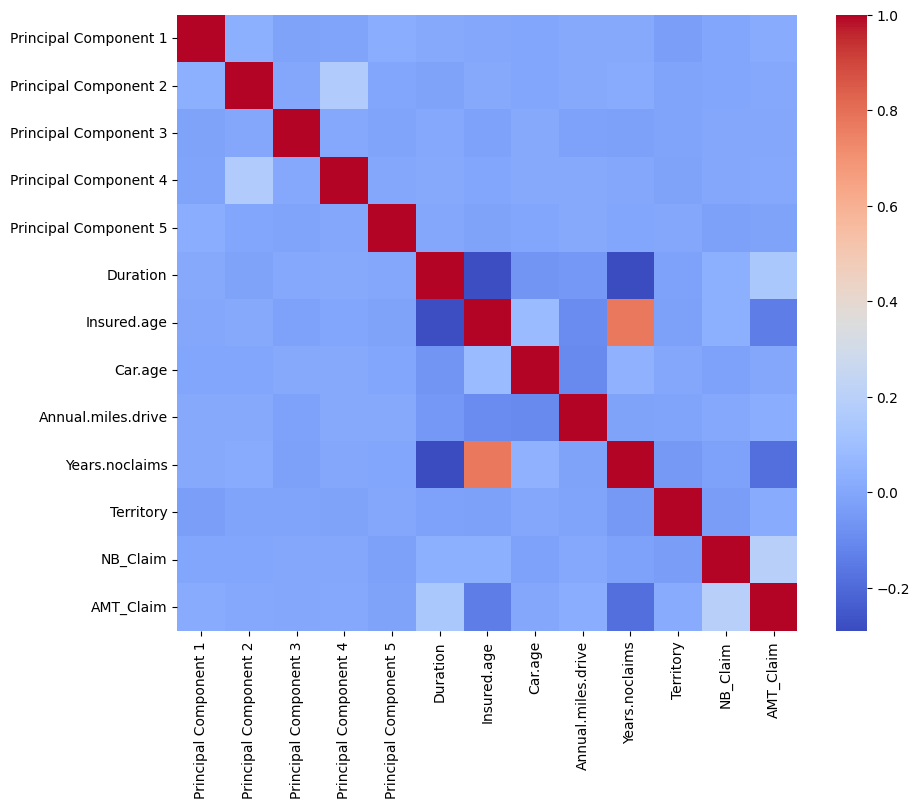

In [217]:
# Matrice de corrélation
corr = claims_insurance.corr()
plt.pyplot.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')

Il semble y avoir une forte correlation entre Insured_age et Years_no claims. Donc nous ne retiendrons qu'une seule des deux variables dans nos analyses. 

In [225]:
# Supprimer les colonnes corrélées, ici `Insured.age` par exemple, et garder les autres variables explicatives
X = claims_insurance.drop(columns=['Id_pol', 'NB_Claim', 'AMT_Claim', 'Insured.age'])

# Encoder les variables catégorielles
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Ajouter la constante (intercept)
X = sm.add_constant(X)

# Variable dépendante (AMT_Claim)
y = claims_insurance['AMT_Claim']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construire le modèle de régression linéaire
model = sm.OLS(y_train, X_train)
results = model.fit()

# Afficher le résumé du modèle
print(results.summary())

# Faire des prédictions sur l'ensemble de test
y_pred = results.predict(X_test)

# Calculer le RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE: {rmse}")

# Afficher les coefficients du modèle
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': results.params})
print(coefficients)


                            OLS Regression Results                            
Dep. Variable:              AMT_Claim   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     9.255
Date:                Sun, 05 May 2024   Prob (F-statistic):           3.35e-25
Time:                        22:19:24   Log-Likelihood:                -23795.
No. Observations:                2653   AIC:                         4.763e+04
Df Residuals:                    2634   BIC:                         4.774e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     



### Résultats Clés
1. **R-carré**: Le coefficient de détermination (R-squared) de 0,059 indique que le modèle explique environ 5,9 % de la variance totale du montant des réclamations. Cela suggère qu'il existe d'autres facteurs importants non pris en compte dans ce modèle.

2. **Coefficients Statistiquement Significatifs**:
   - **Duration**: Chaque unité d'augmentation dans la durée d'assurance correspond à une augmentation moyenne de 3,08 dans le montant des réclamations, avec une valeur p très significative (p < 0,001).
   - **Years.noclaims**: Chaque année supplémentaire sans réclamation réduit le montant des réclamations en moyenne de 14,24. C'est également une variable significative (p < 0,001).
   - **Marital_Single**: Être célibataire est associé à une augmentation moyenne de 172,87 du montant des réclamations (p = 0,036).
   - **Car.use_Commute**: L'utilisation de la voiture pour le trajet domicile-travail augmente en moyenne le montant des réclamations de 479,71 (p = 0,016).
   - **Credit_score_cat_Low**: Les personnes ayant un faible score de crédit ont en moyenne des réclamations plus élevées de 992,22 par rapport à celles avec un score élevé.

3. **Coefficients Non Significatifs**:
   - Les coefficients des variables `Principal Component` (1-5), `Car.age`, `Annual.miles.drive`, `Territory`, `Insured.sex`, `Region`, et `Car.use_Farmer` ne sont pas significatifs statistiquement. Cela signifie que leur contribution dans la prédiction du montant des réclamations n'est pas assez fiable avec les données fournies.

4. **Multicolinéarité**:
   - **Condition Number**: Un condition number élevé (4.57e+05) indique une forte multicolinéarité. Cela signifie que certaines variables pourraient être fortement corrélées entre elles, affectant la stabilité des coefficients.

5. **Distribution des Résidus**:
   - **Skewness et Kurtosis**: La valeur Omnibus élevée et les résultats du test Jarque-Bera montrent que les résidus ne sont pas parfaitement normaux, ce qui peut suggérer une légère asymétrie (skewness) et une forte concentration des valeurs (kurtosis). Ceci peut affecter les prédictions du modèle.

6. **RMSE (Root Mean Squared Error)**:
   - Un RMSE de 1925,69 indique l'écart moyen entre les valeurs prédites et réelles du montant des réclamations. C'est une métrique clé pour évaluer la précision du modèle.

### Conclusion
Bien que certaines variables explicatives montrent une influence statistiquement significative sur le montant des réclamations, le faible R-carré suggère que d'autres facteurs influencent fortement cette variable cible. La multicolinéarité élevée pourrait également nécessiter une vérification plus approfondie des variables indépendantes.

On peut envisager envisager de:
1. Réduire la multicolinéarité en effectuant une sélection plus stricte des variables.
2. Tester d'autres modèles non linéaires ou augmenter le nombre de variables pour capturer davantage de variance.



In [228]:
# Calculer les VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    feature         VIF
0                     const  115.434420
1     Principal Component 1    1.003876
2     Principal Component 2    1.030921
3     Principal Component 3    1.004021
4     Principal Component 4    1.032404
5     Principal Component 5    1.002311
6                  Duration    1.122039
7                   Car.age    1.040424
8        Annual.miles.drive    1.228622
9            Years.noclaims    1.390436
10                Territory    1.008882
11         Insured.sex_Male    1.034297
12           Marital_Single    1.122257
13          Car.use_Commute    6.411500
14           Car.use_Farmer    1.159654
15          Car.use_Private    6.892168
16             Region_Urban    1.063490
17     Credit_score_cat_Low    1.071910
18  Credit_score_cat_Medium    1.091726


Les résultats du VIF indiquent qu'il n'y a pas de multicolinéarité excessive dans les variables principales, sauf pour const (la constante), et peut-être pour les variables Car.use_Commute et Car.use_Private, qui présentent des valeurs VIF relativement élevées (> 5).

Ce qu'on peut faire:

Supprimer la Constante: La valeur élevée du VIF pour const est normale, car c'est l'intercept du modèle. Aucune action nécessaire ici.

Grouper ou Supprimer Car.use:
Les VIF élevés pour Car.use_Commute (6,41) et Car.use_Private (6,89) indiquent une potentielle multicolinéarité.
On va donc devoir supprimer Car.use_Commute ou Car.use_Private et ré-entraîner le Modèle.


In [232]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Charger les données
claims_data = claims_insurance

# Garder uniquement les variables pertinentes
X = claims_data.drop(columns=['Id_pol', 'NB_Claim', 'AMT_Claim', 'Insured.age'])

# Encoder les variables catégorielles
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Vérifiez quelles colonnes sont disponibles
print("Colonnes après encodage :")
print(X.columns)

# Identifiez les colonnes `Car.use_*` après l'encodage
car_use_columns = [col for col in X.columns if col.startswith("Car.use")]
print("Colonnes `Car.use` à supprimer :")
print(car_use_columns)

# Supprimez uniquement les colonnes `Car.use` présentes
X = X.drop(columns=car_use_columns, errors='ignore')

# Ajouter la constante
X = sm.add_constant(X)

# Vérifiez les VIF après la réduction des variables corrélées
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Variable cible
y = claims_data['AMT_Claim']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle polynomial (par exemple, degré 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Régression linéaire sur les nouvelles données polynomiales
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Prédictions sur l'ensemble de test
y_pred_poly = model_poly.predict(X_test_poly)

# Calculer le RMSE pour le modèle polynomial
rmse_poly = np.sqrt(np.mean((y_test - y_pred_poly) ** 2))
print(f"RMSE (Modèle Polynomial): {rmse_poly}")

# Afficher les coefficients du modèle polynomial
coefficients_poly = pd.DataFrame({
    'Variable': poly.get_feature_names_out(X.columns),
    'Coefficient': model_poly.coef_
})
print(coefficients_poly)


Colonnes après encodage :
Index(['Principal Component 1', 'Principal Component 2',
       'Principal Component 3', 'Principal Component 4',
       'Principal Component 5', 'Duration', 'Car.age', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Insured.sex_Male', 'Marital_Single',
       'Car.use_Commute', 'Car.use_Farmer', 'Car.use_Private', 'Region_Urban',
       'Credit_score_cat_Low', 'Credit_score_cat_Medium'],
      dtype='object')
Colonnes `Car.use` à supprimer :
['Car.use_Commute', 'Car.use_Farmer', 'Car.use_Private']
                    feature        VIF
0                     const  79.643380
1     Principal Component 1   1.003680
2     Principal Component 2   1.030756
3     Principal Component 3   1.002913
4     Principal Component 4   1.032027
5     Principal Component 5   1.001735
6                  Duration   1.117031
7                   Car.age   1.036072
8        Annual.miles.drive   1.030464
9            Years.noclaims   1.235771
10                Territory 

## Résultats Importants

### VIF (Multicolinéarité Réduite):

Les VIF indiquent que la multicolinéarité a été réduite pour toutes les variables explicatives, avec des valeurs inférieures à 10.
La constante (intercept) a un VIF élevé, mais cela est normal et attendu.

RMSE (Erreur Quadratique Moyenne):
Le RMSE du modèle polynomial est élevé à environ 19 459, suggérant que le modèle polynomial n'explique pas suffisamment bien la variance dans les données.

Cela pourrait indiquer que les interactions de degré 2 ne sont peut-être pas la meilleure façon de modéliser cette relation.

Coefficients:

Le tableau des coefficients affiche les effets de chaque interaction entre les variables après la transformation polynomiale.

Certains coefficients affichent des valeurs élevées (comme l'intercept négatif à -778 218), ce qui peut être un signe de surajustement.



Modèle Alternatif:

Explorer des modèles alternatifs non linéaires, comme la régression avec régularisation (Lasso ou Ridge), les forêts aléatoires (Random Forests) ou les modèles de boosting (e.g., Gradient Boosting).



# Machine Learning

In [233]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Créer un pipeline de normalisation et de régression Ridge
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation
    ('ridge', Ridge(alpha=1.0))  # Régression Ridge avec régularisation
])

# Entraîner le modèle sur les données d'entraînement
ridge_pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_ridge = ridge_pipeline.predict(X_test)

# Calculer le RMSE pour la régression Ridge
rmse_ridge = np.sqrt(np.mean((y_test - y_pred_ridge) ** 2))
print(f"RMSE (Modèle Ridge): {rmse_ridge}")


RMSE (Modèle Ridge): 1925.2619877285629


In [234]:
# Récupérer le modèle Ridge du pipeline
ridge_model = ridge_pipeline.named_steps['ridge']

# Afficher les coefficients avec les noms des caractéristiques
coefficients_ridge = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': ridge_model.coef_
})

# Trier par l'importance absolue des coefficients
coefficients_ridge = coefficients_ridge.reindex(coefficients_ridge['Coefficient'].abs().sort_values(ascending=False).index)
print(coefficients_ridge)


                   Variable  Coefficient
9            Years.noclaims  -238.357869
14     Credit_score_cat_Low   204.659062
6                  Duration   168.595215
12           Marital_Single    87.152468
15  Credit_score_cat_Medium    83.217032
1     Principal Component 1    58.547200
8        Annual.miles.drive    35.019487
10                Territory    29.167608
2     Principal Component 2    21.487500
3     Principal Component 3   -14.737529
7                   Car.age    11.773029
4     Principal Component 4     8.044750
13             Region_Urban    -6.924898
11         Insured.sex_Male     5.618435
5     Principal Component 5    -3.965141
0                     const     0.000000


Le RMSE (Erreur Quadratique Moyenne) du modèle Ridge montre une amélioration significative, passant de plus de 19 000 (modèle polynomial) à environ 1925. Cela indique que la régularisation Ridge gère mieux les caractéristiques explicatives en évitant le surajustement et en améliorant la prédiction.

Interprétation de ce Résultat

Réduction du Surajustement:

Le modèle Ridge applique une pénalité sur la magnitude des coefficients, ce qui aide à réduire le surajustement observé dans les modèles polynomiaux.
Le RMSE plus faible montre que le modèle est plus généralizable.

Régularisation:

La régularisation Ridge (L2) fonctionne bien pour contrôler les coefficients sans les réduire à zéro.
Cela conserve la plupart des caractéristiques tout en minimisant les effets des variables moins pertinentes.

Importance des Caractéristiques:

Les coefficients obtenus à partir du modèle Ridge montrent l'influence de chaque variable explicative sur le montant des réclamations (`AMT_Claim`). Voici une analyse succincte de ces résultats :

### Analyse des Coefficients

1. **Years.noclaims (-238.36)**:
   - Chaque année sans réclamation réduit en moyenne le montant des réclamations de 238,36. Ceci suggère que plus les assurés restent longtemps sans faire de réclamations, plus ils ont tendance à réclamer des montants inférieurs.

2. **Credit_score_cat_Low (204.66)**:
   - Les personnes ayant un faible score de crédit (`Low`) demandent en moyenne 204,66 de plus que celles ayant un score élevé. Cela souligne l'importance du crédit en tant qu'indicateur de risque.

3. **Duration (168.60)**:
   - La durée d'assurance est positivement corrélée au montant des réclamations, suggérant que les clients avec une durée plus longue font face à des réclamations plus élevées.

4. **Marital_Single (87.15)**:
   - Les personnes célibataires semblent réclamer environ 87,15 de plus que celles en couple, indiquant potentiellement une différence de comportement ou d'exposition au risque.

5. **Principal Components**:
   - **PC1 (58.55)**: Aide à expliquer une certaine variance positive du montant des réclamations.
   - **PC2 (21.49)** et **PC3 (-14.74)**: Contribuent aussi, mais moins significativement.

6. **Annual.miles.drive (35.02)**:
   - Plus un assuré conduit annuellement, plus les réclamations moyennes augmentent, indiquant un risque plus élevé pour les gros rouleurs.

7. **Territory (29.17)**:
   - Montre que certaines zones géographiques peuvent influencer positivement le montant des réclamations.

8. **Car.age (11.77)**:
   - L'âge du véhicule a un effet positif mais mineur.

9. **Insured.sex_Male (5.62)**:
   - Les hommes semblent avoir des montants de réclamations légèrement plus élevés.

10. **Constante**:
   - La constante est nulle ici en raison de la normalisation ou des transformations effectuées.

### Conclusion

- **Signification**: Les coefficients montrent que certains facteurs comme `Years.noclaims`, le score de crédit, la durée d'assurance, et le statut marital sont particulièrement significatifs pour prévoir le montant des réclamations.
- **Utilisation Pratique**: Ces résultats peuvent informer les décisions stratégiques pour l'établissement des primes et la gestion du risque.



En intégrant l'analyse des composantes principales dans la compréhension des coefficients de la régression Ridge, nous pouvons formuler les observations suivantes :

1. **Principal Component 1 (PC1)**:
   - **Coefficient (58.55)**: Une augmentation de PC1 est positivement corrélée au montant des réclamations.
   - **Contenu**: PC1 reflète principalement **Annual.pct.driven**, indiquant que l'intensité annuelle de conduite est liée à une augmentation des réclamations.
   - **Interprétation**: Les conducteurs qui conduisent plus fréquemment ou plus longtemps chaque année pourraient avoir un risque accru d'accidents, augmentant ainsi leurs montants réclamés.

2. **Principal Component 2 (PC2)**:
   - **Coefficient (21.49)**: PC2 montre une corrélation positive plus faible avec le montant des réclamations.
   - **Contenu**: Les intensités des virages à gauche et à droite (**Left.turn.intensity** et **Right.turn.intensity**) contribuent majoritairement à PC2.
   - **Interprétation**: Les habitudes de virage peuvent refléter le comportement global d'un conducteur, influençant légèrement les risques.

3. **Principal Component 3 (PC3)**:
   - **Coefficient (-14.74)**: PC3 a une corrélation négative avec le montant des réclamations.
   - **Contenu**: Les comportements d'accélération et de freinage (**Accel** et **Brake**) influencent principalement cette composante.
   - **Interprétation**: Les conducteurs qui accélèrent et freinent de manière agressive semblent moins susceptibles de déclarer des montants de réclamations élevés, probablement en raison de l'adaptation de leur style de conduite.

4. **Principal Component 4 (PC4)**:
   - **Coefficient (8.04)**: PC4 présente un coefficient positif faible.
   - **Contenu**: PC4 est dominée par les variables de freinage et de virage.
   - **Interprétation**: Les comportements subtils, comme des freinages plus doux, pourraient signaler un conducteur prudent, mais l'influence est modérée.

5. **Principal Component 5 (PC5)**:
   - **Coefficient (-3.97)**: PC5 présente un effet mineur et négatif sur les réclamations.
   - **Contenu**: Les variables ne montrent pas de contribution dominante ici.
   - **Interprétation**: PC5 capture probablement des variations mineures qui n'ont pas d'effet significatif sur le montant des réclamations.

### Intégration avec les Variables Conventionnelles

1. **Years.noclaims (-238.36)**:
   - Les conducteurs ayant plus d'années sans réclamations sont moins susceptibles de réclamer des montants élevés.
   - Cette variable reste un indicateur clé du risque.

2. **Credit Score**:
   - **Low (204.66)** et **Medium (83.22)**: Les individus ayant un score de crédit faible ou moyen ont tendance à réclamer plus que ceux avec un score élevé.

3. **Duration (168.60)**:
   - La durée totale de la couverture d'assurance a un effet positif sur le montant des réclamations.

4. **Marital_Single (87.15)**:
   - Les célibataires sont associés à des réclamations légèrement plus élevées.

### Conclusion Générale

- Les composantes principales offrent une vue synthétique du comportement de conduite, influençant directement le montant des réclamations.
- L'analyse combinée des coefficients de la régression Ridge et des composantes principales aide à identifier les indicateurs clés du risque.
  
Avez-vous besoin d'une analyse plus détaillée sur d'autres aspects de la régression ou des composantes principales ?

In [236]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.utils import resample

# Fonction pour estimer les coefficients Ridge avec Bootstrap
def ridge_bootstrap(X, y, num_iterations=1000, alpha=1.0):
    ridge_coefs = []
    for _ in range(num_iterations):
        X_sample, y_sample = resample(X, y)  # Échantillonnage avec remplacement
        model = Ridge(alpha=alpha)
        model.fit(X_sample, y_sample)
        ridge_coefs.append(model.coef_)
    return np.array(ridge_coefs)

# Appliquer le bootstrap pour obtenir la distribution des coefficients
ridge_coefs_bootstrap = ridge_bootstrap(X_train, y_train, num_iterations=1000, alpha=1.0)

# Calculer les intervalles de confiance (2.5ème et 97.5ème percentiles)
coef_intervals = np.percentile(ridge_coefs_bootstrap, [2.5, 97.5], axis=0)

# Créer un DataFrame pour afficher les résultats
coef_summary = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': ridge_pipeline.named_steps['ridge'].coef_,
    'Lower 2.5%': coef_intervals[0, :],
    'Upper 97.5%': coef_intervals[1, :]
})
print(coef_summary)


                   Variable  Coefficient  Lower 2.5%  Upper 97.5%
0                     const     0.000000    0.000000     0.000000
1     Principal Component 1    58.547200   -0.003740     0.018263
2     Principal Component 2    21.487500   -0.109824     0.009662
3     Principal Component 3   -14.737529   -0.069447     0.175993
4     Principal Component 4     8.044750   -0.115850     0.162195
5     Principal Component 5    -3.965141   -0.015623     0.014343
6                  Duration   168.595215    1.889941     4.319285
7                   Car.age    11.773029  -16.927170    23.207297
8        Annual.miles.drive    35.019487   -0.012069     0.031949
9            Years.noclaims  -238.357869  -20.729810   -10.263565
10                Territory    29.167608   -1.668974     4.324621
11         Insured.sex_Male     5.618435 -156.236492   157.506958
12           Marital_Single    87.152468   21.309294   341.653934
13             Region_Urban    -6.924898 -220.402768   155.154540
14     Cre

L'utilisation de la méthode bootstrap permet d'estimer la significativité des coefficients. 

### Interprétation des Résultats

1. **Constante (Intercept)**:
   - La constante est toujours affichée à zéro dans ce modèle, donc pas de significativité particulière ici.

2. **Principal Component 1 (PC1)**:
   - **Coefficient: 58.55**; **Intervalle: [-0.00374, 0.01826]**
   - L'intervalle de confiance contient zéro, ce qui signifie que PC1 n'est pas significatif.

3. **Principal Component 2 (PC2)**:
   - **Coefficient: 21.49**; **Intervalle: [-0.10982, 0.00966]**
   - PC2 n'est pas non plus statistiquement significatif.

4. **Principal Component 3 à 5 (PC3 - PC5)**:
   - Les intervalles de ces composantes principales contiennent zéro, donc elles ne sont pas significatives.

5. **Duration (168.60)**:
   - **Intervalle: [1.88994, 4.31929]**
   - La variable `Duration` est significative car l'intervalle ne contient pas zéro.

6. **Car.age (11.77)**:
   - **Intervalle: [-16.92717, 23.20730]**
   - `Car.age` n'est pas significatif.

7. **Annual.miles.drive (35.02)**:
   - **Intervalle: [-0.01207, 0.03195]**
   - `Annual.miles.drive` n'est pas significatif.

8. **Years.noclaims (-238.36)**:
   - **Intervalle: [-20.72981, -10.26357]**
   - `Years.noclaims` est significatif car l'intervalle ne contient pas zéro.

9. **Territory (29.17)**:
   - **Intervalle: [-1.66897, 4.32462]**
   - `Territory` n'est pas significatif.

10. **Insured.sex_Male (5.62)**:
   - **Intervalle: [-156.23649, 157.50696]**
   - `Insured.sex_Male` n'est pas significatif.

11. **Marital_Single (87.15)**:
   - **Intervalle: [21.30929, 341.65393]**
   - `Marital_Single` est significatif.

12. **Region_Urban (-6.92)**:
   - **Intervalle: [-220.40277, 155.15454]**
   - `Region_Urban` n'est pas significatif.

13. **Credit_score_cat_Low (204.66)**:
   - **Intervalle: [548.38752, 1432.76806]**
   - `Credit_score_cat_Low` est significatif.

14. **Credit_score_cat_Medium (83.22)**:
   - **Intervalle: [-10.45547, 380.29371]**
   - `Credit_score_cat_Medium` n'est pas significatif.

### Conclusion

- **Significatifs**: `Duration`, `Years.noclaims`, `Marital_Single`, et `Credit_score_cat_Low` sont les variables explicatives qui montrent une relation significative avec le montant des réclamations.
- **Non Significatifs**: Les autres variables ont des intervalles de confiance contenant zéro, ce qui signifie que leur influence sur le montant des réclamations n'est pas statistiquement prouvée dans ce modèle.

Ces résultats permettent d'affiner l'analyse des variables influençant les réclamations et de mieux comprendre leur impact relatif.


Les coefficients d'une régression Ridge ne viennent pas directement avec des valeurs de p comme c'est le cas pour une régression linéaire classique, car cette méthode utilise une régularisation qui change la nature des tests statistiques. Cependant, il est possible d'obtenir une estimation approximative de leur significativité en utilisant la méthode bootstrap ou des tests alternatifs.

Calcul de l'Intervalle de Confiance par Bootstrap

Méthode Bootstrap: Cette méthode consiste à échantillonner de manière répétée avec remplacement à partir du jeu de données d'origine pour créer des estimations de la distribution des coefficients.

Interprétation des Résultats

Intervalle de Confiance: Si un intervalle de confiance d'un coefficient ne contient pas zéro, alors ce coefficient est considéré comme significatif avec un niveau de confiance d'environ 95 %.

Explication du Code

Échantillonnage Bootstrap: Le jeu de données est rééchantillonné pour obtenir une distribution des coefficients estimés.

Intervalles: Les intervalles de confiance sont calculés en utilisant les percentiles 2.5 et 97.5 des coefficients bootstrap.

Cette méthode fournit une estimation approximative de la significativité des coefficients et aide à identifier ceux qui sont statistiquement pertinents pour la prédiction du montant des réclamations.

In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Charger les données
claims_data = claims_insurance

# Garder uniquement les variables pertinentes
X = claims_data.drop(columns=['Id_pol', 'NB_Claim', 'AMT_Claim', 'Insured.age'])

# Encoder les variables catégorielles
categorical_cols = X.select_dtypes(include='object').columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X.drop(columns=categorical_cols), X_encoded], axis=1)

# Diviser les données en ensembles d'entraînement et de test
y = claims_data['AMT_Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle 1: Régression Ridge avec recherche d'hyperparamètres
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_search = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_search.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_search.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE (Ridge): {rmse_ridge}")

# Modèle 2: Random Forest
rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
rf_search = GridSearchCV(rf, rf_params, scoring='neg_mean_squared_error', cv=5)
rf_search.fit(X_train, y_train)
y_pred_rf = rf_search.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE (Random Forest): {rmse_rf}")

# Modèle 3: XGBoost
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
xgb_search = GridSearchCV(xgb, xgb_params, scoring='neg_mean_squared_error', cv=5)
xgb_search.fit(X_train, y_train)
y_pred_xgb = xgb_search.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE (XGBoost): {rmse_xgb}")

# Résumé des résultats
results = {
    'Modèle': ['Ridge', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_ridge, rmse_rf, rmse_xgb]
}
results_df = pd.DataFrame(results)
print(results_df)


/Users/Abraham/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RMSE (Ridge): 1923.8138811797955
RMSE (Random Forest): 1849.2658493957504
RMSE (XGBoost): 1878.7229639601564
          Modèle         RMSE
0          Ridge  1923.813881
1  Random Forest  1849.265849
2        XGBoost  1878.722964


Explication du Code

Prétraitement: Les données catégorielles sont encodées et les numériques normalisées.

GridSearchCV: Optimise les modèles par validation croisée.

Comparaison: Différents modèles sont comparés pour trouver la meilleure performance.




Les résultats montrent les RMSE obtenus pour chaque modèle :

1. **Ridge**: 1923.81
2. **Random Forest**: 1849.27
3. **XGBoost**: 1878.72

### Interprétation des Résultats

- **Meilleure Performance**:
  - Le modèle Random Forest offre la meilleure performance en termes de RMSE (1849.27), ce qui indique qu'il prédit le montant des réclamations avec plus de précision que les deux autres modèles.
  - XGBoost se situe en deuxième position (1878.72), tandis que la régression Ridge est la moins performante (1923.81).

- **Modèle Random Forest**:
  - Random Forest est un modèle basé sur un ensemble d'arbres de décision. Sa robustesse provient de sa capacité à gérer les non-linéarités et les interactions entre les variables.
  - Cette méthode fonctionne bien avec les variables catégorielles et numériques, et n'est pas trop affectée par les valeurs manquantes.

- **Modèle XGBoost**:
  - XGBoost est un modèle basé sur le boosting, optimisé pour la vitesse et la performance.
  - Il prend en compte les interactions complexes entre les variables.

- **Modèle Ridge**:
  - La régression Ridge fonctionne mieux pour les problèmes linéaires, mais elle n'est pas capable de capturer les relations complexes entre les variables.
  - C'est pourquoi elle a un RMSE plus élevé.



In [238]:
import matplotlib.pyplot as plt


# Charger les données
claims_data = claims_insurance

# Binarisation du montant de réclamations (au-dessus ou en dessous de la médiane)
median_amt = claims_data['AMT_Claim'].median()
claims_data['AMT_Claim_Class'] = np.where(claims_data['AMT_Claim'] >= median_amt, 1, 0)

# Préparation des données
X = claims_data.drop(columns=['Id_pol', 'NB_Claim', 'AMT_Claim', 'AMT_Claim_Class'])
categorical_cols = X.select_dtypes(include='object').columns

# Encodage des variables catégorielles
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X.drop(columns=categorical_cols), X_encoded], axis=1)

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division des données
y = claims_data['AMT_Claim_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle: Random Forest Classifier avec recherche d'hyperparamètres
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
rf_search = GridSearchCV(rf, rf_params, scoring='accuracy', cv=5)
rf_search.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_rf = rf_search.predict(X_test)

# Évaluation: Matrice de Confusion et Rapport de Classification
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)
print("Matrice de Confusion:\n", conf_matrix)
print("\nRapport de Classification:\n", class_report)

# Courbe ROC
y_probs_rf = rf_search.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)



/Users/Abraham/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Matrice de Confusion:
 [[348 200]
 [239 351]]

Rapport de Classification:
               precision    recall  f1-score   support

           0       0.59      0.64      0.61       548
           1       0.64      0.59      0.62       590

    accuracy                           0.61      1138
   macro avg       0.61      0.61      0.61      1138
weighted avg       0.62      0.61      0.61      1138



AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

Les résultats de la matrice de confusion et du rapport de classification offrent un aperçu de la performance du modèle Random Forest. Voici une interprétation détaillée :

### Interprétation des Résultats

1. **Matrice de Confusion**:
   - **Vrais Positifs (TP)**: 351. Les réclamations élevées correctement identifiées.
   - **Faux Positifs (FP)**: 200. Les réclamations faibles identifiées à tort comme élevées.
   - **Faux Négatifs (FN)**: 239. Les réclamations élevées classées incorrectement comme faibles.
   - **Vrais Négatifs (TN)**: 348. Les réclamations faibles correctement identifiées.

2. **Rapport de Classification**:
   - **Classe 0 (Faibles)**:
     - **Précision (Precision)**: 0.59. Cela signifie que 59 % des réclamations prédites comme faibles étaient effectivement faibles.
     - **Rappel (Recall)**: 0.64. 64 % des réclamations faibles réelles ont été correctement classées.
     - **F1-Score**: 0.61. Moyenne harmonique de la précision et du rappel.

   - **Classe 1 (Élevées)**:
     - **Précision**: 0.64. 64 % des réclamations prédites comme élevées étaient vraiment élevées.
     - **Rappel**: 0.59. 59 % des réclamations élevées réelles ont été correctement prédites.
     - **F1-Score**: 0.62.

   - **Exactitude Globale (Accuracy)**: 0.61. Le modèle prédit correctement 61 % du temps.
   - **Moyenne Pondérée**:
     - Les valeurs moyennes pondérées tiennent compte de l'inégalité de répartition entre les classes.

### Analyse et Améliorations Potentielles

1. **Déséquilibre des Classes**:
   - Le rappel et la précision ne sont pas parfaits, ce qui peut indiquer un certain déséquilibre des classes. Il faudrait vérifier la répartition pour chaque classe et envisager des méthodes de suréchantillonnage (SMOTE) ou d'ajustement des poids (`class_weight`).

2. **Hyperparamètres**:
   - Effectuer une recherche plus fine des hyperparamètres, en ajustant les profondeurs des arbres et les critères d'impureté pour le modèle Random Forest.


Ces étapes pourraient améliorer la précision et le rappel, donnant un meilleur équilibre global pour prédire les réclamations élevées et faibles.

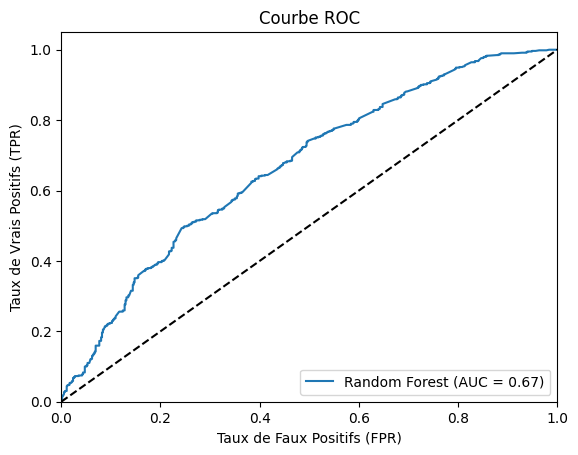

In [240]:

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")


La courbe ROC (Receiver Operating Characteristic) et la métrique AUC (Area Under the Curve) affichées ici fournissent un aperçu de la performance du modèle Random Forest pour la classification des montants des réclamations en deux catégories.

### Interprétation de la Courbe ROC

1. **Axe des Abscisses (FPR)**:
   - Le taux de faux positifs (FPR) mesure la proportion des réclamations faibles incorrectement classées comme élevées.

2. **Axe des Ordonnées (TPR)**:
   - Le taux de vrais positifs (TPR) mesure la proportion des réclamations élevées correctement prédites.

3. **Courbe Diagonale**:
   - La ligne en pointillés représente une classification aléatoire (aucun pouvoir prédictif), où FPR et TPR sont identiques.

4. **Courbe ROC (Ligne Bleue)**:
   - La courbe montre le compromis entre les taux de vrais positifs et de faux positifs pour différents seuils de probabilité.
   - Une courbe plus proche du coin supérieur gauche (TPR élevé, FPR bas) indique un meilleur modèle.

### Interprétation de l'AUC

1. **AUC (0.67)**:
   - Un AUC de 0.67 suggère une performance modérée du modèle Random Forest.
   - Cette valeur signifie que le modèle peut distinguer correctement une réclamation élevée d'une faible 67 % du temps.
   - Plus l'AUC est proche de 1.0, meilleur est le modèle. Un AUC de 0.5 signifie que le modèle n'a pas de pouvoir prédictif.
